# Stock Analysis - Find key levels of pricing using Clustering Models
Author: Poongodi P

#### Description:
This project aims at finding the key levels of pricing that group with each other for all the available tickers individually.
#### Input: 
CSV file with approx 20K rows
#### Models used:
1. KMeans clustering (Centroid based)
2. DBSCAN clustering (Density Based)
3. Agglomerative Clustering (Hierarchial)

#### Evaluation metrics:
Silhouette score
Elbow method to find optimum number of clusters

In [7]:
import pandas as pd
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import cdist

import scipy.cluster.hierarchy as shc


#Read the input csv file to a dataframe
dfdata = pd.read_csv("2022-01-16_fractals_log.csv",';')
dfdata = dfdata[['Datetime','Ticker','superior_POI_price','TF']].copy()
dfdata

,Datetime,Ticker,superior_POI_price,TF
0,2021-10-27,AUDCAD,0.93369,D1
1,2021-10-11,AUDCAD,0.91033,D1
2,2021-07-19,AUDCAD,0.94157,D1
3,2021-06-03,AUDCAD,0.92673,D1
4,2021-04-21,AUDCAD,0.97557,D1
...,...,...,...,...
19924,2019-09-18 12:00:00+01:00,USDJPY,108.44576,H12
19925,2019-08-26 00:00:00+01:00,USDJPY,104.83753,H12
19926,2019-08-01 00:00:00+01:00,USDJPY,109.26183,H12
19927,2019-06-25 00:00:00+01:00,USDJPY,106.81337,H12


In [2]:
ticks = dfdata['Ticker'].unique()

# Hierarchial clustering model - Agglomerative

In [ ]:
tick='AUDCAD'
dftick = dfdata[dfdata['Ticker'] == tick]
#######################################################################
########## Remove outliers using zscore (sd of 3 are removed) ########### 
#######################################################################

z_scores = scipy.stats.zscore(dftick['superior_POI_price'])

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
dftick1 = dftick[filtered_entries]
dftick1.sort_values('superior_POI_price')
dftick1.reset_index(drop=True,inplace=True)

X =dftick1['superior_POI_price']
y = dftick1['TF']
dffeatures = pd.DataFrame(X)

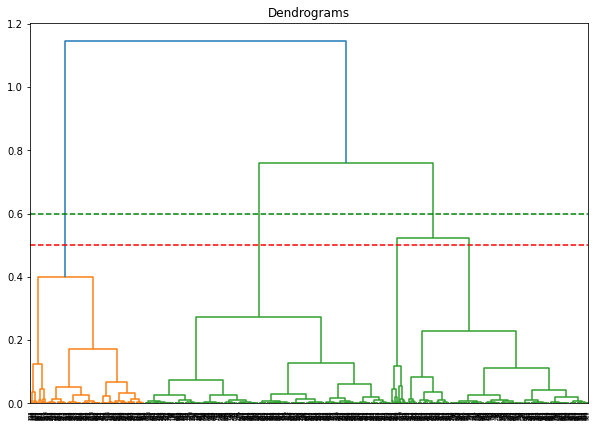

In [35]:

########################################################################
#Draw scipy dendrogram
#Note:Consumes time!
plt.figure(figsize=(10,7))
plt.title('Dendrograms')
dend = shc.dendrogram(shc.linkage(dffeatures,method='ward'))

#draw marker at .5 or .6 since the longest vertical line is present there
plt.axhline(y=.5,color='r',linestyle='--')
plt.axhline(y=.6,color='g',linestyle='--')

plt.savefig('dendrogram_AUDCAD.png')
#2 clusters are found at .6 - 2 and at .5 - 3

In [25]:

#######################################################################
#######Apply Agglomerative for n- 3
cluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
grp = cluster.fit_predict(dffeatures)
print(grp)

[2 0 2 2 1 2 1 2 1 0 1 0 2 0 1 0 0 0 0 2 0 2 2 2 0 2 0 0 0 0 0 2 0 2 0 2 0
 2 0 2 2 2 2 2 2 2 2 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2
 0 2 0 2 0 0 0 2 0 2 0 2 0 2 2 2 0 2 0 0 0 2 0 2 0 0 2 0 1 0 0 0 0 0 2 2 2
 2 1 0 2 1 1 2 1 2 1 1 1 1 1 1 1 2 1 2 1 2 1 2 2 0 1 2 1 2 1 2 1 2 1 1 1 1
 1 2 1 2 1 1 1 1 1 1 2 0 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 2 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 2 0 2 0 2 2 2 0 2 0 2 2 2 2 2 2 2
 2 2 2 2 2 1 2 1 1 1 1 2 0 2 0 2 0 2 0 2 2 2 2 1 2 1 1 0 2 0 2 0 2 0 2 2 2
 2 1 2 1 1 0 1 2 1 0 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 1 2 1 2 2 2 2 2 1 2 1 2 2 2 2 2 1 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 2 2
 2 2 2 2 2 2 1 2 1 2 2 2 1 2 2 2 2 2 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 2 2 2 1 2 1 2 2 0 0 0 1 

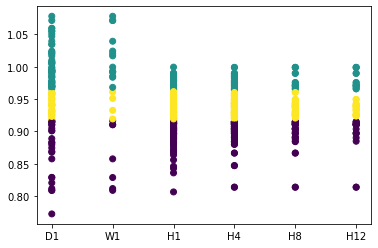

In [34]:
plt.scatter(y,dffeatures,c=cluster.labels_)
plt.savefig('agglomerative_AUDCAD.png')

# Export model ouputs to excel

In [33]:

dftick1 = dftick[filtered_entries]
dftick1.sort_values('superior_POI_price')
dftick1.reset_index(drop=True,inplace=True)
X =dftick1['superior_POI_price']
y = dftick1['TF']
dffeatures = pd.DataFrame(X)


#################################################################
####  kmeans 
#################################################################
ncluster = 3
kmeans = KMeans(ncluster,random_state = 4,n_init = 12).fit(dffeatures)
labels = kmeans.labels_
dftick1.insert(3,'Kmeans_Grouping',kmeans.labels_)
dftick1.reset_index(drop=True,inplace=True)

#######################################################################
#######Apply Agglomerative for n- 3
cluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
cluster.fit_predict(dffeatures)

#Add labels as last column
dftick1.insert(4,'AGG_Grouping',grp)
dftick1.reset_index(drop=True,inplace=True)


#################################################################
###### DBSCAN clustering
#################################################################
db = DBSCAN(eps=0.0009, min_samples=10).fit(dffeatures)
dblabels = db.labels_

#Add labels as last column
dftick1.insert(5,'DBSCAN_Grouping',dblabels)
dftick1.reset_index(drop=True,inplace=True)

dftick1.to_excel('AUDCAD.xls')


# DBSCAN clustering model

DBSCAN clustering
Estimated number of clusters: 15
Estimated number of noise points: 183


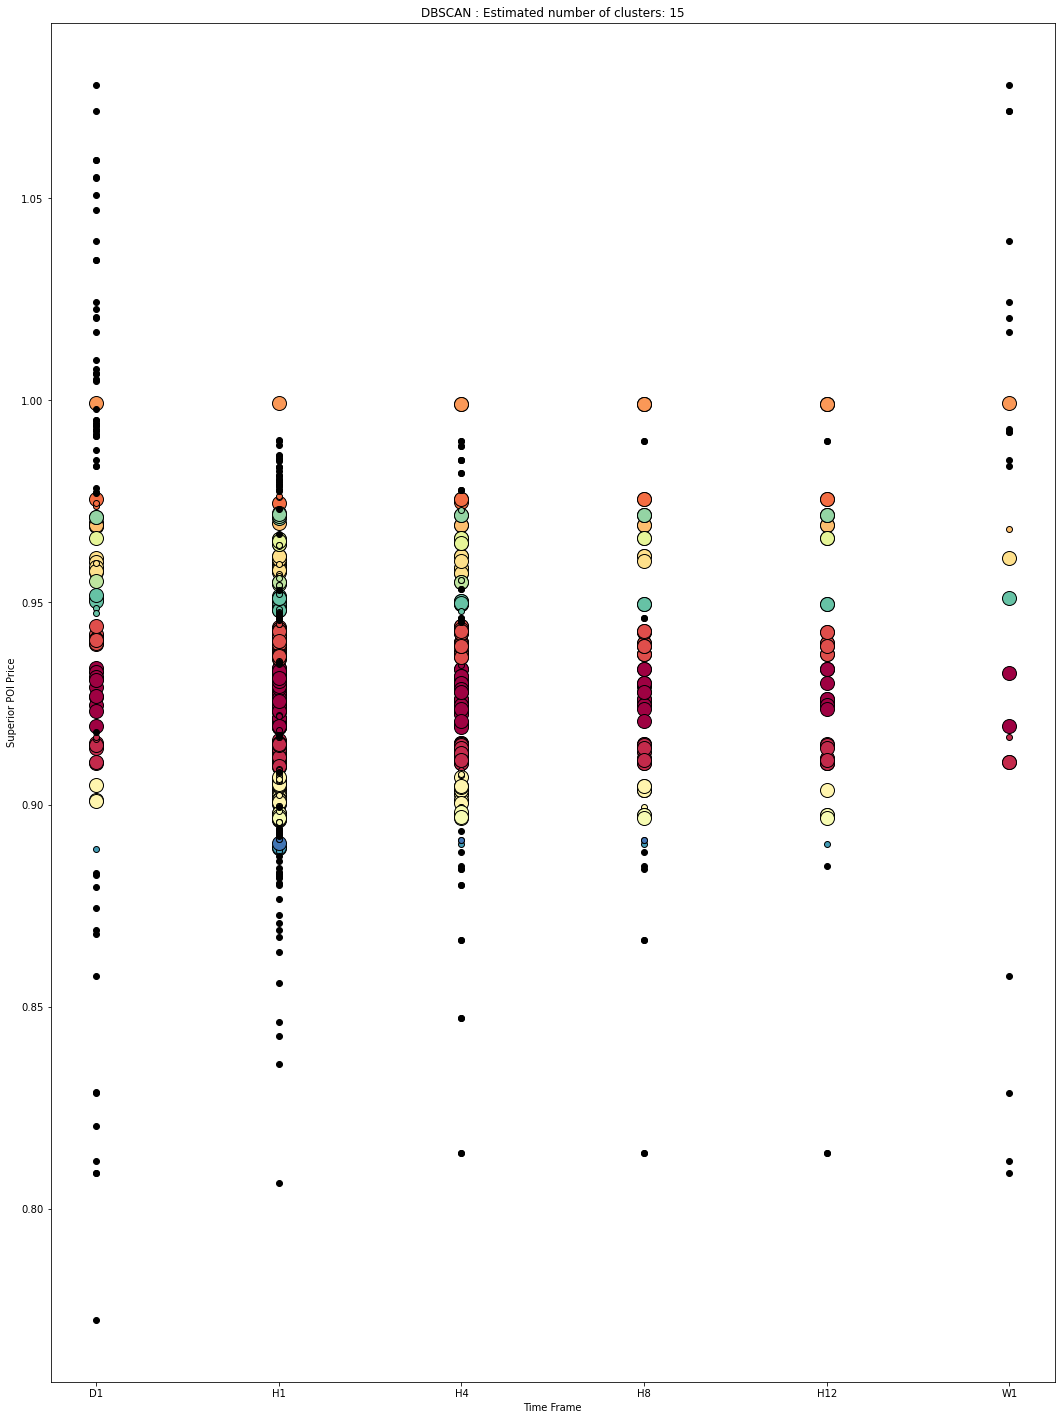

In [101]:
tick='AUDCAD'
dftick = dfdata[dfdata['Ticker'] == tick]

########## Remove outliers using zscore (sd of 3 are removed) ########### 
z_scores = scipy.stats.zscore(dftick['superior_POI_price'])

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
dftick1 = dftick[filtered_entries]

dftick1.sort_values('superior_POI_price')
dftick1.reset_index(drop=True,inplace=True)

X =dftick1['superior_POI_price']
y = dftick1['TF']
dffeatures = pd.DataFrame(X)

#
#################################################################
###### DBSCANclustering
#################################################################


db = DBSCAN(eps=0.0009, min_samples=10).fit(dffeatures)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
dblabels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(dblabels)) - (1 if -1 in dblabels else 0)
n_noise_ = list(dblabels).count(-1)

print('DBSCAN clustering')
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
#print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(dffeatures, dblabels))

#Add labels as last column
dftick1.insert(3,'DBSCAN_Grouping',dblabels)
dftick1 = dftick1.sort_values('DBSCAN_Grouping')
dftick1.reset_index(drop=True,inplace=True)
dftick1.to_excel(tick + '.xls')

#################################################################
#Charts
#################################################################

fig=plt.figure(figsize=(18,25))

############### DBSCAN chart ################
ax2 = fig.add_subplot(1,1,1)
# Black removed and is used for noise instead.
unique_labels = set(dblabels)
dbcolors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, dbcolors):
    if k == -1:
       # break
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = dblabels == k
    xy = X[class_member_mask & core_samples_mask]
    yy = y[class_member_mask & core_samples_mask]

    ax2.plot(
        yy,
        xy,
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    yy = y[class_member_mask & ~core_samples_mask]
    ax2.plot(
        yy,
        xy,
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

    ax2.set_title('DBSCAN : Estimated number of clusters: %d' % n_clusters_)
    ax2.set_ylabel('Superior POI Price')
    ax2.set_xlabel('Time Frame')

    
# Show the plot
plt.savefig(tick + '.png')
plt.show()


## DBSCAN plot with datetime in x axis

DBSCAN clustering
Estimated number of clusters: 15
Estimated number of noise points: 183


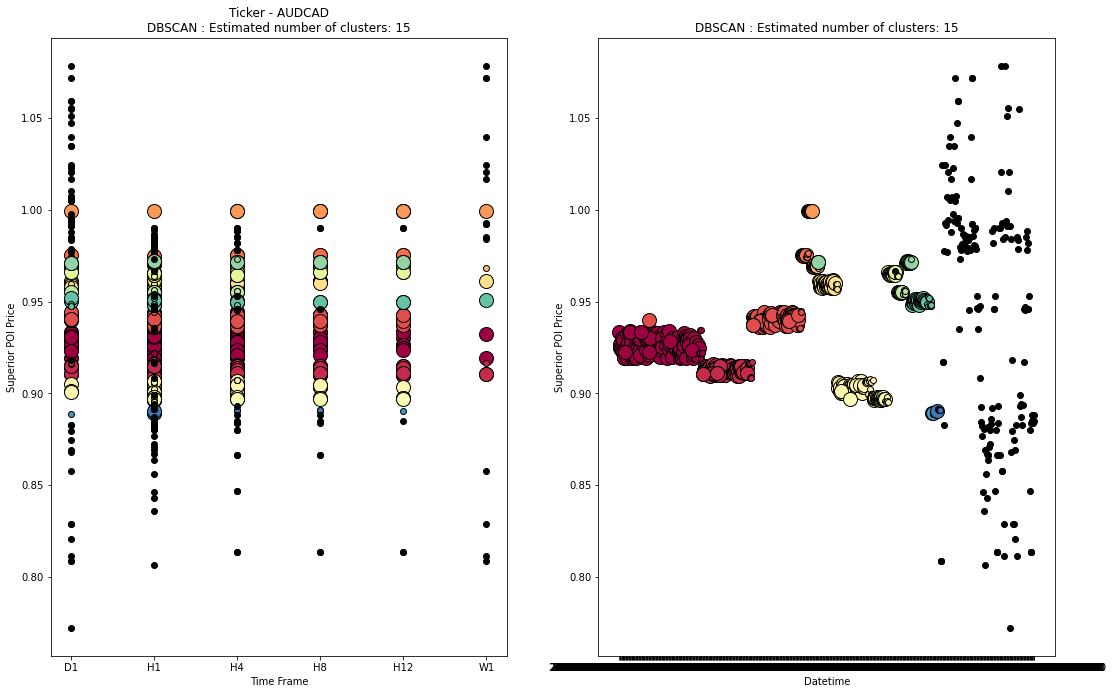

In [105]:
tick='AUDCAD'
dftick = dfdata[dfdata['Ticker'] == tick]

########## Remove outliers using zscore (sd of 3 are removed) ########### 
z_scores = scipy.stats.zscore(dftick['superior_POI_price'])

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
dftick1 = dftick[filtered_entries]

dftick1.sort_values('superior_POI_price')
dftick1.reset_index(drop=True,inplace=True)

X =dftick1['superior_POI_price']
y = dftick1['TF']
z = dftick1['Datetime']
dffeatures = pd.DataFrame(X)

#
#################################################################
###### DBSCANclustering
#################################################################


db = DBSCAN(eps=0.0009, min_samples=10).fit(dffeatures)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
dblabels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(dblabels)) - (1 if -1 in dblabels else 0)
n_noise_ = list(dblabels).count(-1)

print('DBSCAN clustering')
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
#print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(dffeatures, dblabels))

#Add labels as last column
dftick1.insert(3,'DBSCAN_Grouping',dblabels)
dftick1 = dftick1.sort_values('DBSCAN_Grouping')
dftick1.reset_index(drop=True,inplace=True)
dftick1.to_excel(tick + '.xls')

#################################################################
#Charts
#################################################################

fig=plt.figure(figsize=(18,25))

############### DBSCAN chart ################
ax2 = fig.add_subplot(2,2,1)
# Black removed and is used for noise instead.
unique_labels = set(dblabels)
dbcolors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, dbcolors):
    if k == -1:
       # break
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = dblabels == k
    xy = X[class_member_mask & core_samples_mask]
    yy = y[class_member_mask & core_samples_mask]

    ax2.plot(
        yy,
        xy,
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    yy = y[class_member_mask & ~core_samples_mask]
    ax2.plot(
        yy,
        xy,
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

    ax2.set_title('Ticker - ' + tick + '\nDBSCAN : Estimated number of clusters: %d' % n_clusters_)
    ax2.set_ylabel('Superior POI Price')
    ax2.set_xlabel('Time Frame')

ax = fig.add_subplot(2,2,2)
# Black removed and is used for noise instead.
unique_labels = set(dblabels)
dbcolors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, dbcolors):
    if k == -1:
       # break
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = dblabels == k
    xy = X[class_member_mask & core_samples_mask]
    yy = z[class_member_mask & core_samples_mask]

    ax.plot(
        yy,
        xy,
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    yy = z[class_member_mask & ~core_samples_mask]
    ax.plot(
        yy,
        xy,
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

    ax.set_title('DBSCAN : Estimated number of clusters: %d' % n_clusters_)
    ax.set_ylabel('Superior POI Price')
    ax.set_xlabel('Datetime')


# Show the plot
plt.savefig(tick + '.png')
plt.show()


# Kmeans and DBSCAN Clustering


Ticker - AUDCAD
Kmeans Silhouette Score for 3 clusters:0.5096058939486058
DBSCAN clustering
Estimated number of clusters: 3
Estimated number of noise points: 56


E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - AUDCHF
Kmeans Silhouette Score for 3 clusters:0.5018079042072724
DBSCAN clustering
Estimated number of clusters: 2
Estimated number of noise points: 100


E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - AUDJPY
Kmeans Silhouette Score for 3 clusters:0.5866603462505514
DBSCAN clustering
Estimated number of clusters: 0
Estimated number of noise points: 750


E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - AUDNZD
Kmeans Silhouette Score for 3 clusters:0.5361919395088344
DBSCAN clustering
Estimated number of clusters: 3
Estimated number of noise points: 46


E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - AUDUSD
Kmeans Silhouette Score for 3 clusters:0.5550121609640202
DBSCAN clustering
Estimated number of clusters: 3
Estimated number of noise points: 96


E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - CADCHF
Kmeans Silhouette Score for 3 clusters:0.6608254899474357
DBSCAN clustering
Estimated number of clusters: 3
Estimated number of noise points: 64


E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - CADJPY
Kmeans Silhouette Score for 3 clusters:0.5423720875691523
DBSCAN clustering
Estimated number of clusters: 0
Estimated number of noise points: 771


E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - CHFJPY
Kmeans Silhouette Score for 3 clusters:0.6159881961160301
DBSCAN clustering
Estimated number of clusters: 1
Estimated number of noise points: 793


E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - EURAUD
Kmeans Silhouette Score for 3 clusters:0.7713087872227017
DBSCAN clustering
Estimated number of clusters: 4
Estimated number of noise points: 98


E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - EURCAD
Kmeans Silhouette Score for 3 clusters:0.5214820190105004
DBSCAN clustering
Estimated number of clusters: 4
Estimated number of noise points: 36


E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - EURCHF
Kmeans Silhouette Score for 3 clusters:0.8156500512757104
DBSCAN clustering
Estimated number of clusters: 3
Estimated number of noise points: 84


E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - EURGBP
Kmeans Silhouette Score for 3 clusters:0.6437372577738322
DBSCAN clustering
Estimated number of clusters: 2
Estimated number of noise points: 88


E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - EURJPY
Kmeans Silhouette Score for 3 clusters:0.5776488896738051
DBSCAN clustering
Estimated number of clusters: 0
Estimated number of noise points: 678


E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - EURUSD
Kmeans Silhouette Score for 3 clusters:0.7266080255172297
DBSCAN clustering
Estimated number of clusters: 7
Estimated number of noise points: 82


E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - EURNZD
Kmeans Silhouette Score for 3 clusters:0.4988557085953907
DBSCAN clustering
Estimated number of clusters: 7
Estimated number of noise points: 80


E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - GBPAUD
Kmeans Silhouette Score for 3 clusters:0.7504546845334308
DBSCAN clustering
Estimated number of clusters: 5
Estimated number of noise points: 146


E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - GBPCAD
Kmeans Silhouette Score for 3 clusters:0.6403297611029286
DBSCAN clustering
Estimated number of clusters: 4
Estimated number of noise points: 115


E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - GBPCHF
Kmeans Silhouette Score for 3 clusters:0.5983998987381987
DBSCAN clustering
Estimated number of clusters: 3
Estimated number of noise points: 100


E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - GBPJPY
Kmeans Silhouette Score for 3 clusters:0.6310712665619767
DBSCAN clustering
Estimated number of clusters: 0
Estimated number of noise points: 658


E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - GBPNZD
Kmeans Silhouette Score for 3 clusters:0.53477037747764
DBSCAN clustering
Estimated number of clusters: 5
Estimated number of noise points: 90


E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - GBPUSD
Kmeans Silhouette Score for 3 clusters:0.6220883647422727
DBSCAN clustering
Estimated number of clusters: 7
Estimated number of noise points: 78


<ipython-input-75-f9528eaaaff0>:74: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure(figsize=(18,18))
E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - NZDCAD
Kmeans Silhouette Score for 3 clusters:0.5368622900313588
DBSCAN clustering
Estimated number of clusters: 1
Estimated number of noise points: 60


<ipython-input-75-f9528eaaaff0>:74: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure(figsize=(18,18))
E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - NZDCHF
Kmeans Silhouette Score for 3 clusters:0.5597615562592384
DBSCAN clustering
Estimated number of clusters: 2
Estimated number of noise points: 79


<ipython-input-75-f9528eaaaff0>:74: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure(figsize=(18,18))
E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - NZDJPY
Kmeans Silhouette Score for 3 clusters:0.5681057666491913
DBSCAN clustering
Estimated number of clusters: 0
Estimated number of noise points: 645


<ipython-input-75-f9528eaaaff0>:74: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure(figsize=(18,18))
E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - NZDUSD
Kmeans Silhouette Score for 3 clusters:0.5700496481274986
DBSCAN clustering
Estimated number of clusters: 4
Estimated number of noise points: 74


<ipython-input-75-f9528eaaaff0>:74: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure(figsize=(18,18))
E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - USDCAD
Kmeans Silhouette Score for 3 clusters:0.5777017050219152
DBSCAN clustering
Estimated number of clusters: 5
Estimated number of noise points: 123


<ipython-input-75-f9528eaaaff0>:74: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure(figsize=(18,18))
E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - USDCHF
Kmeans Silhouette Score for 3 clusters:0.6782477680510278
DBSCAN clustering
Estimated number of clusters: 4
Estimated number of noise points: 27


<ipython-input-75-f9528eaaaff0>:74: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure(figsize=(18,18))
E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - USDJPY
Kmeans Silhouette Score for 3 clusters:0.6212793962317787
DBSCAN clustering
Estimated number of clusters: 0
Estimated number of noise points: 701


<ipython-input-75-f9528eaaaff0>:74: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure(figsize=(18,18))
E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


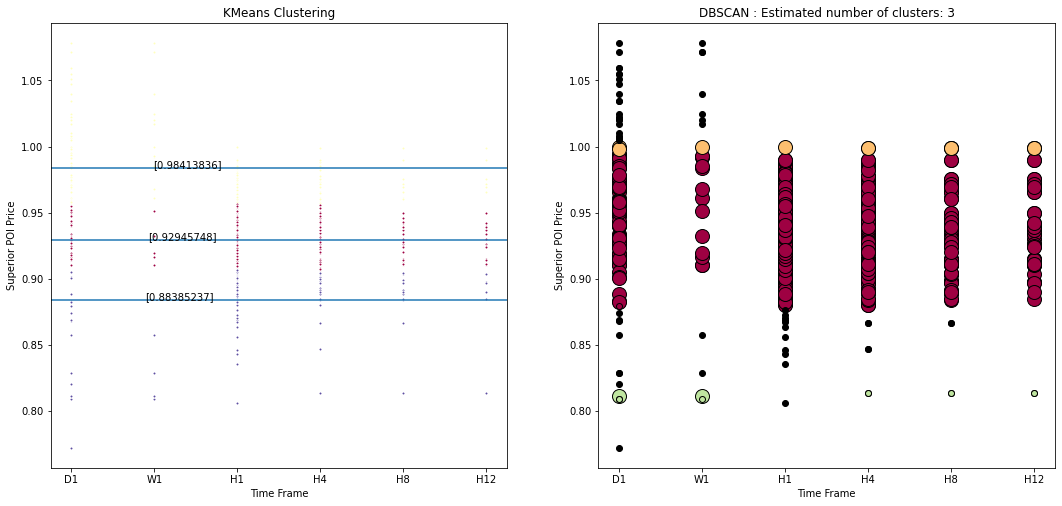

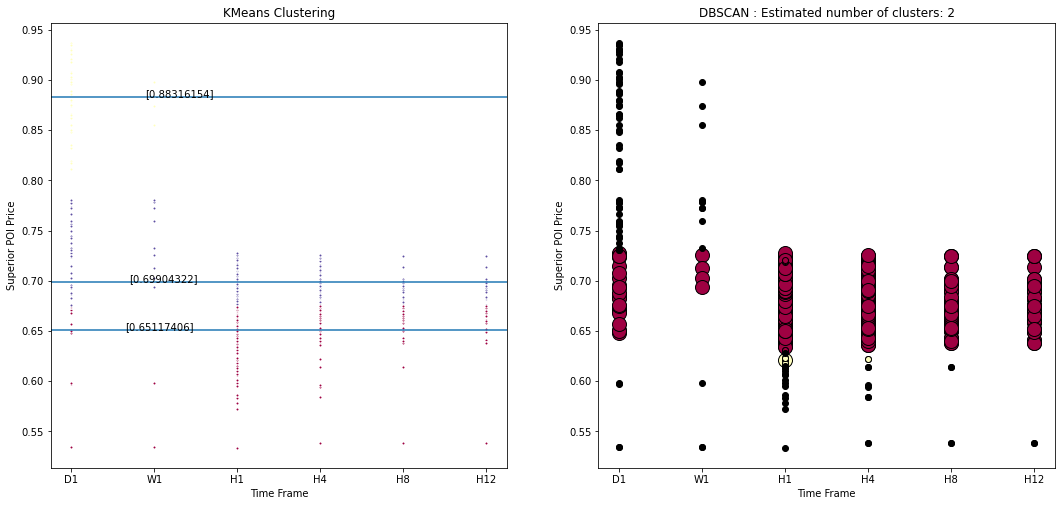

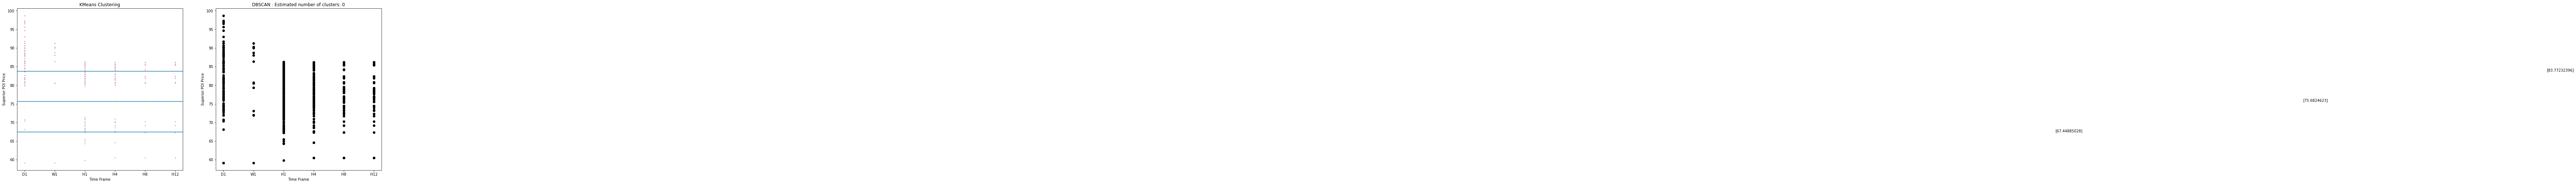

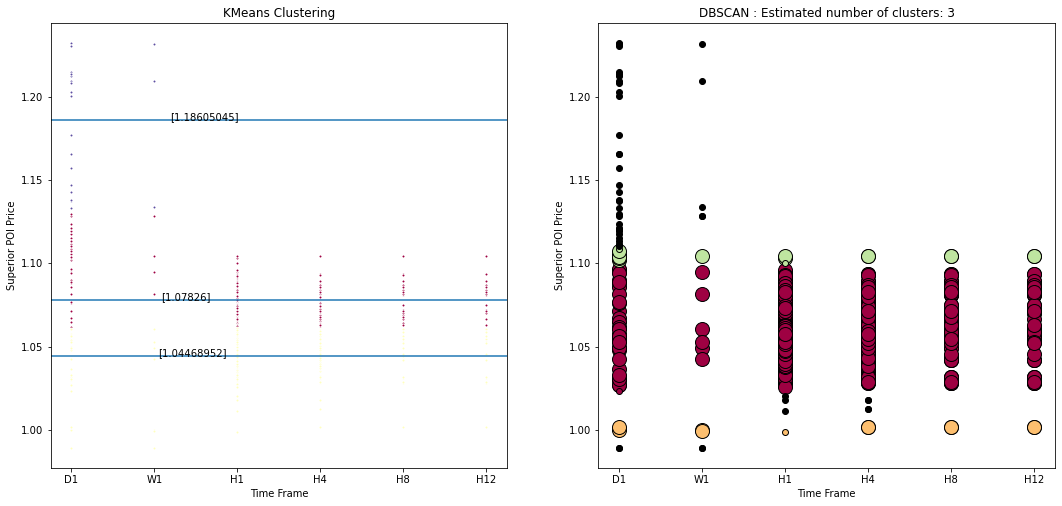

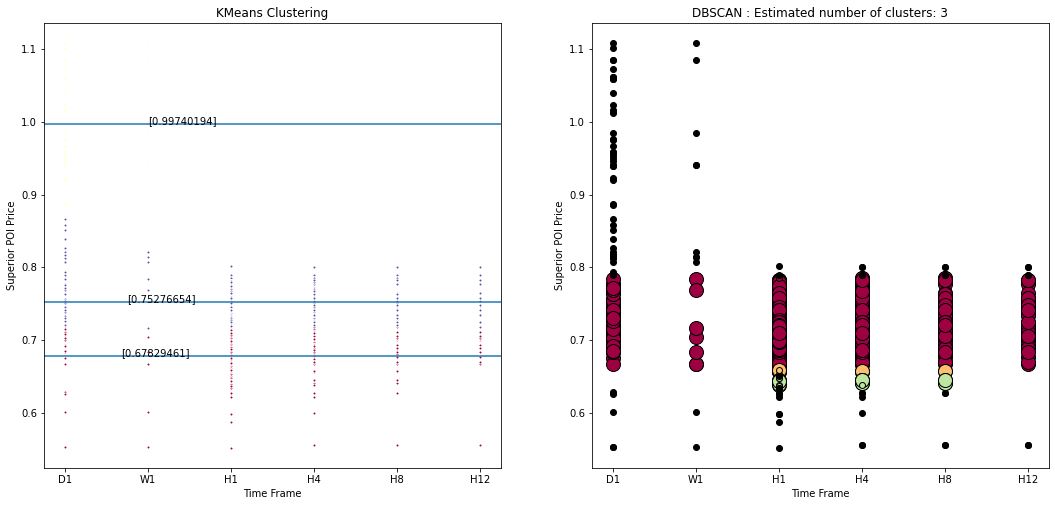

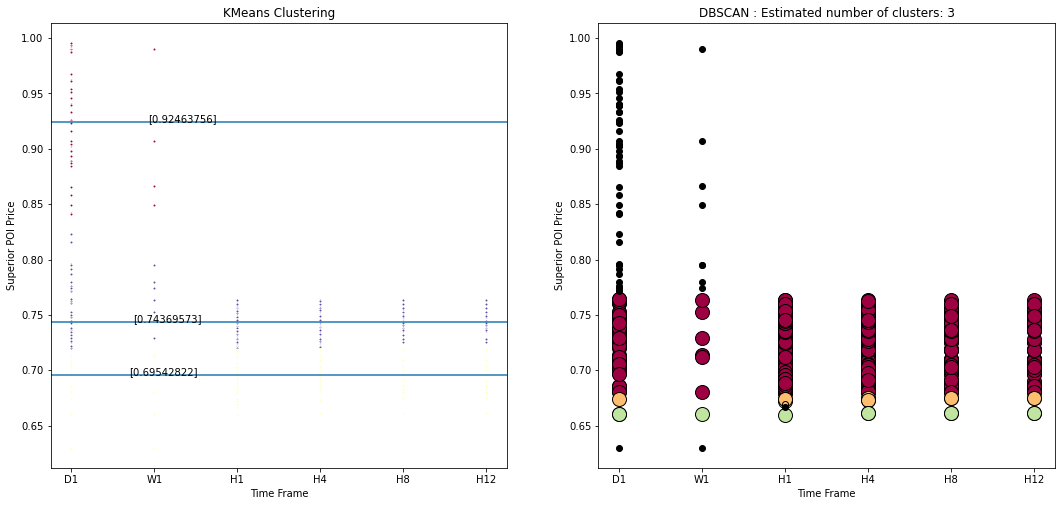

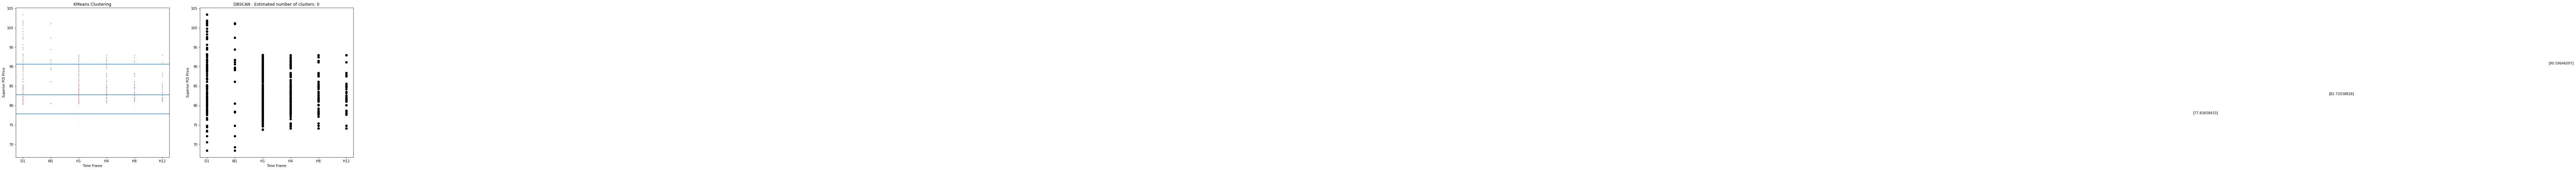

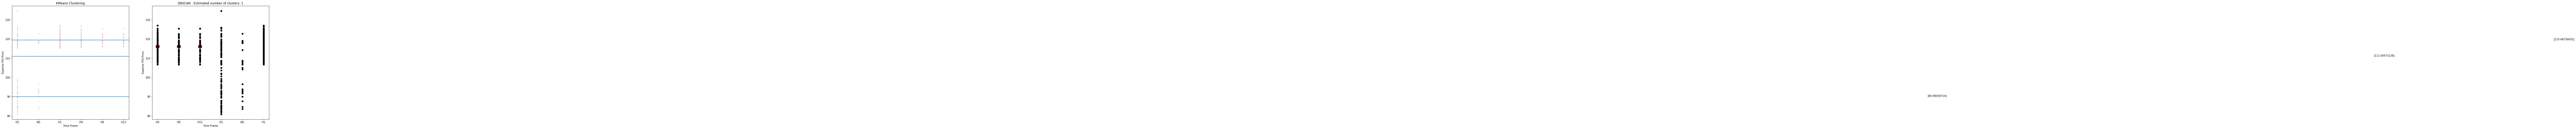

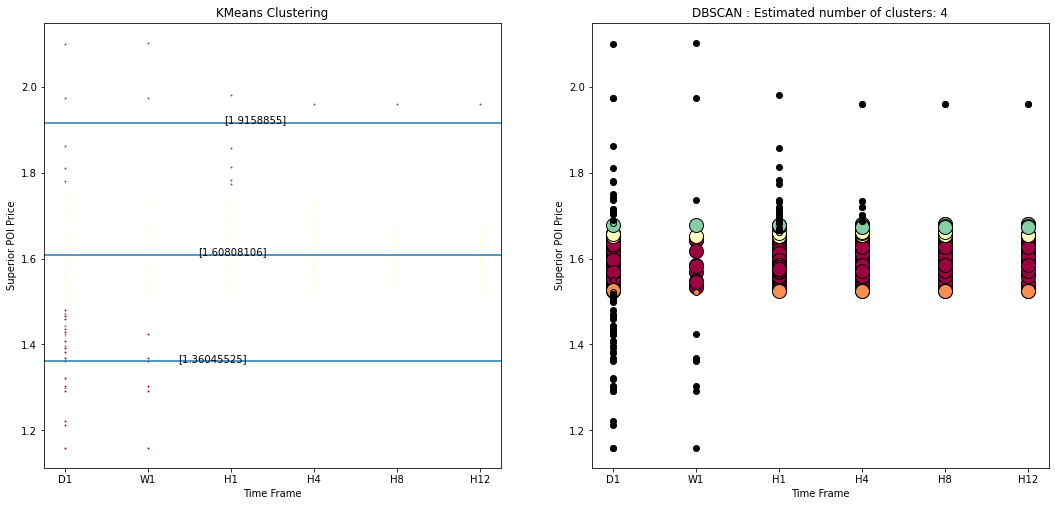

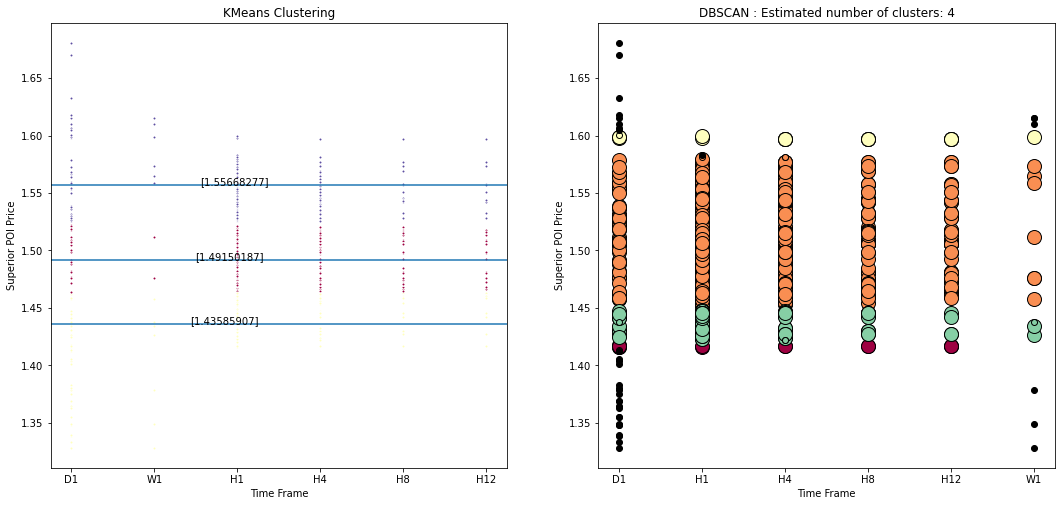

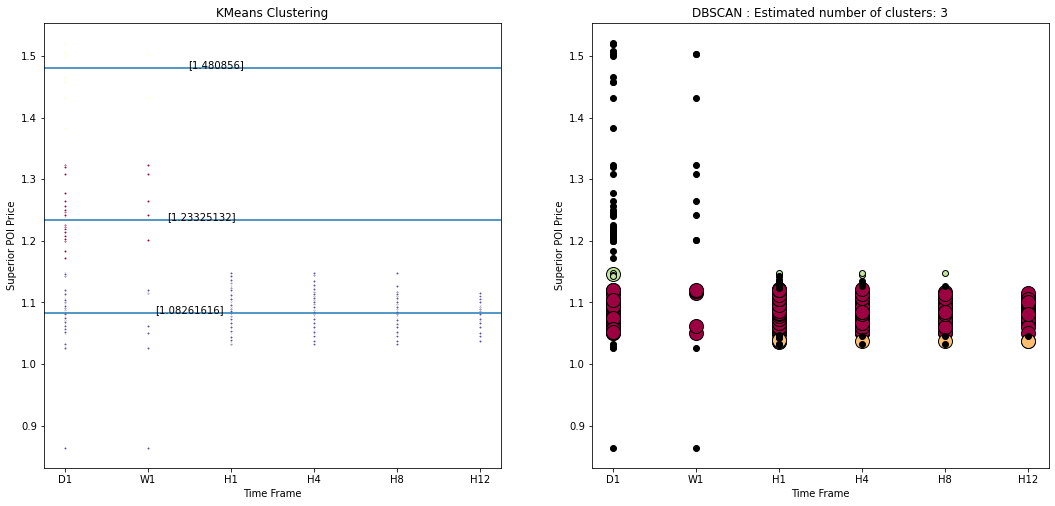

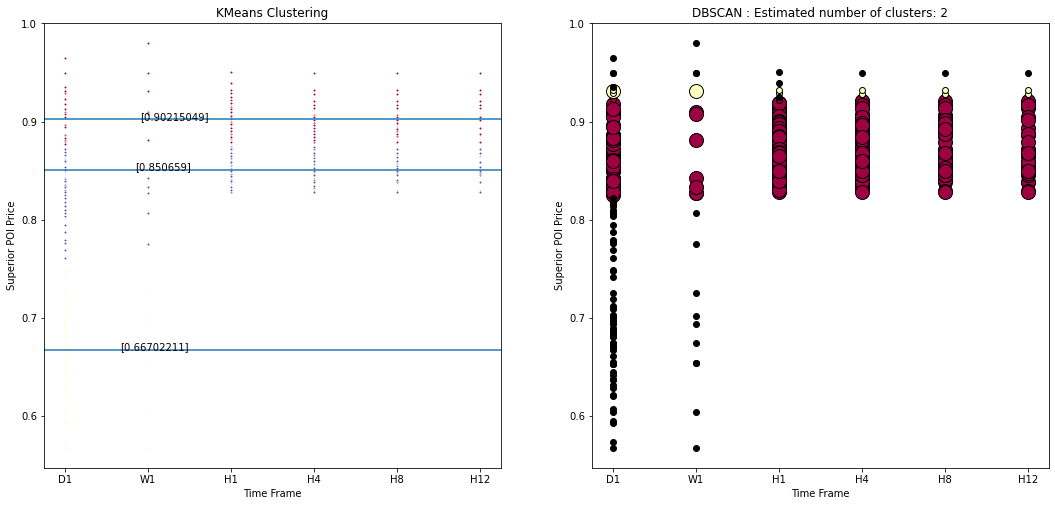

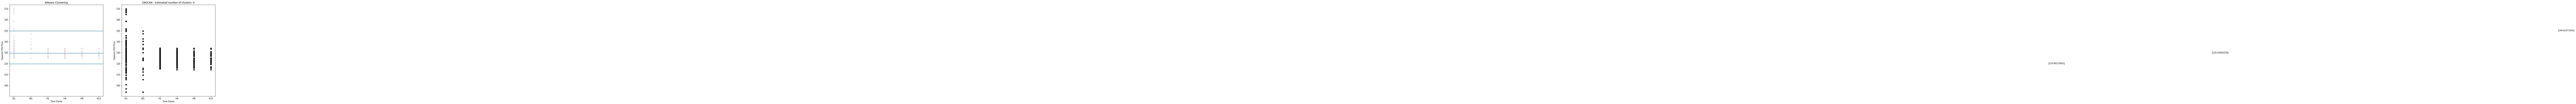

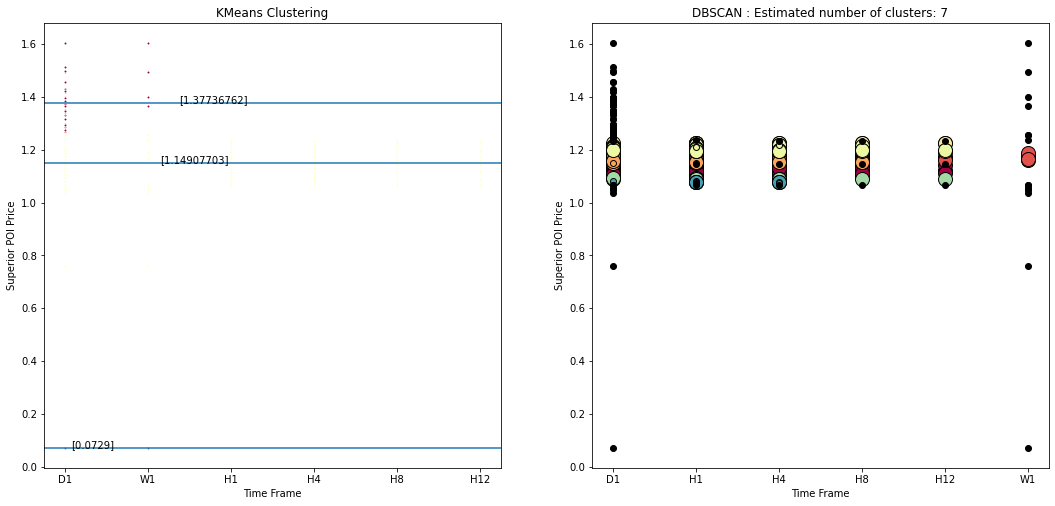

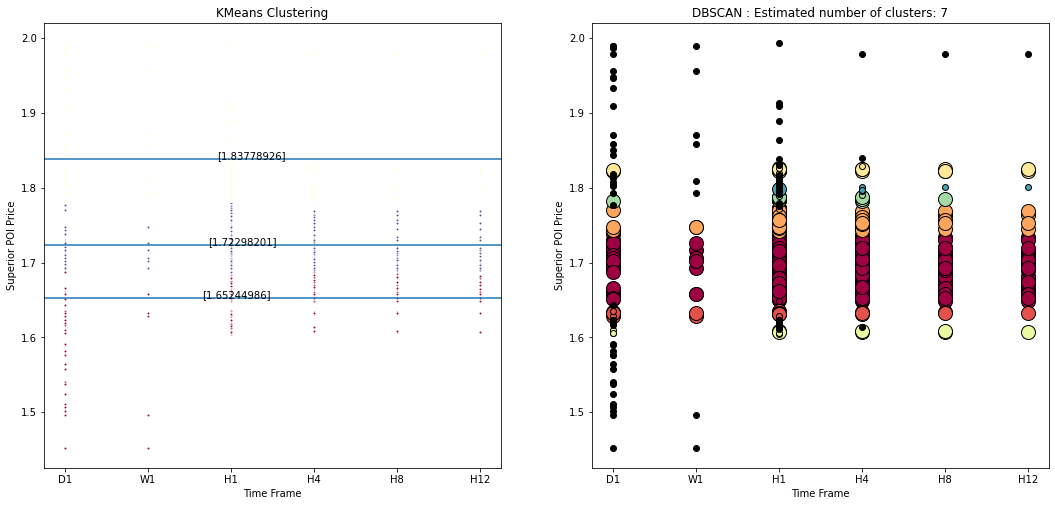

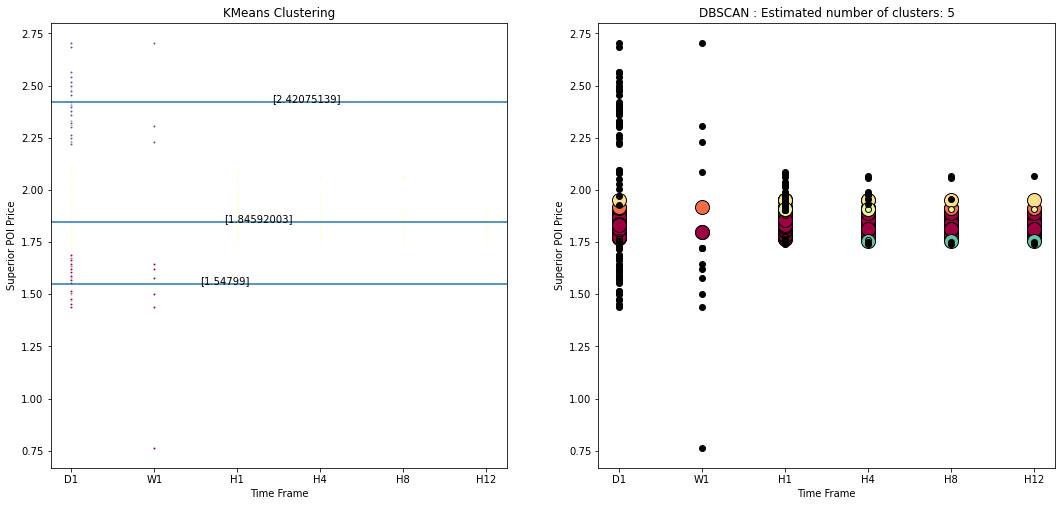

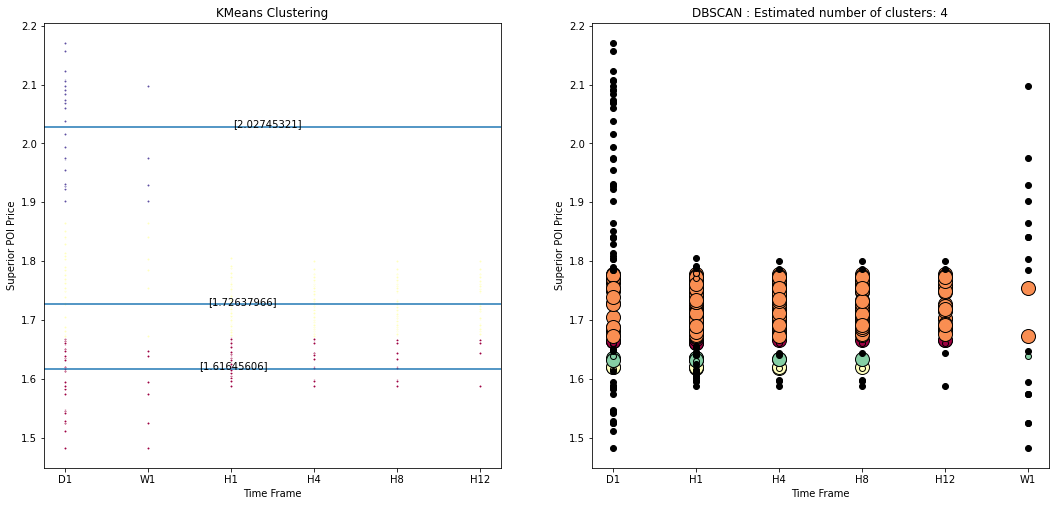

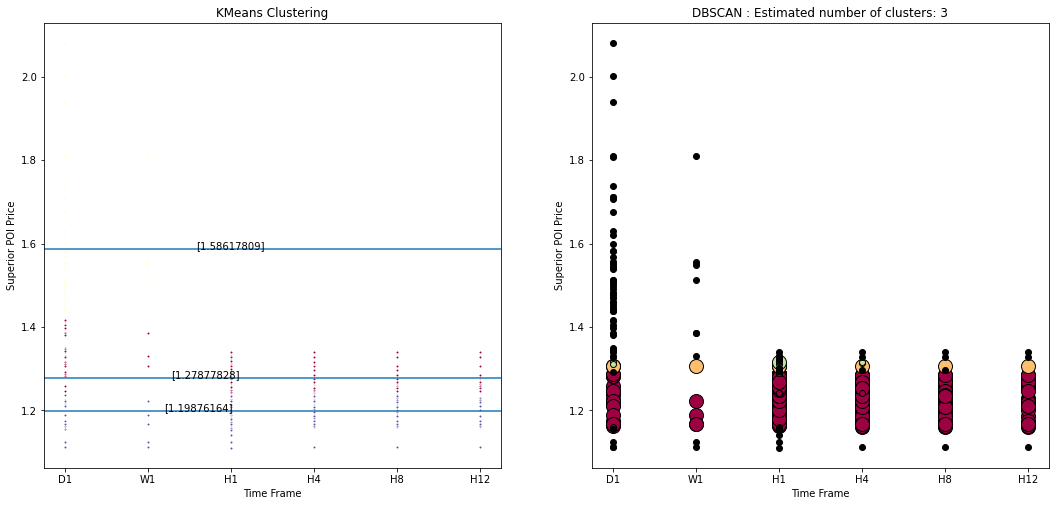

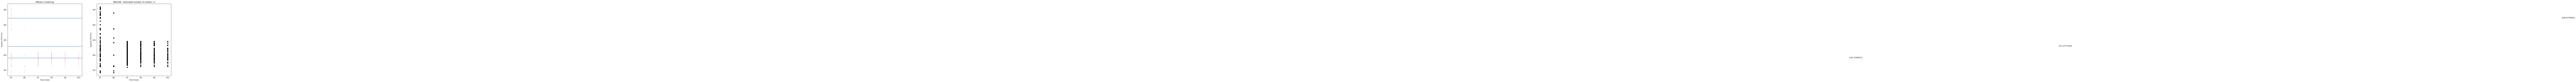

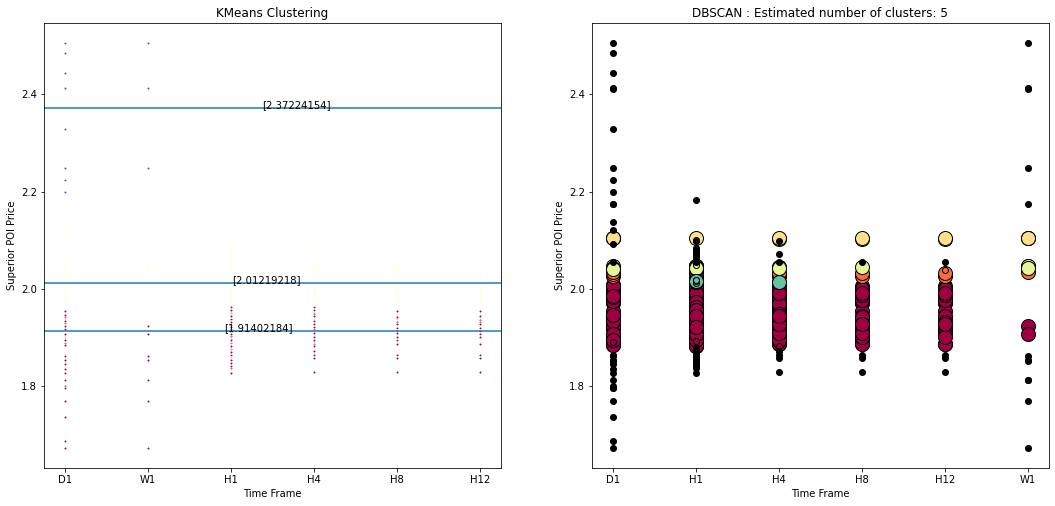

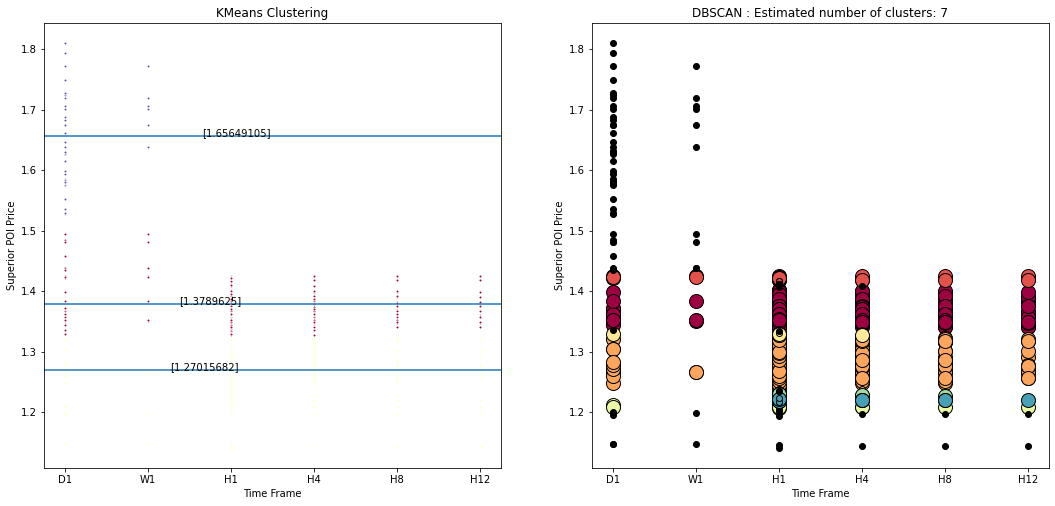

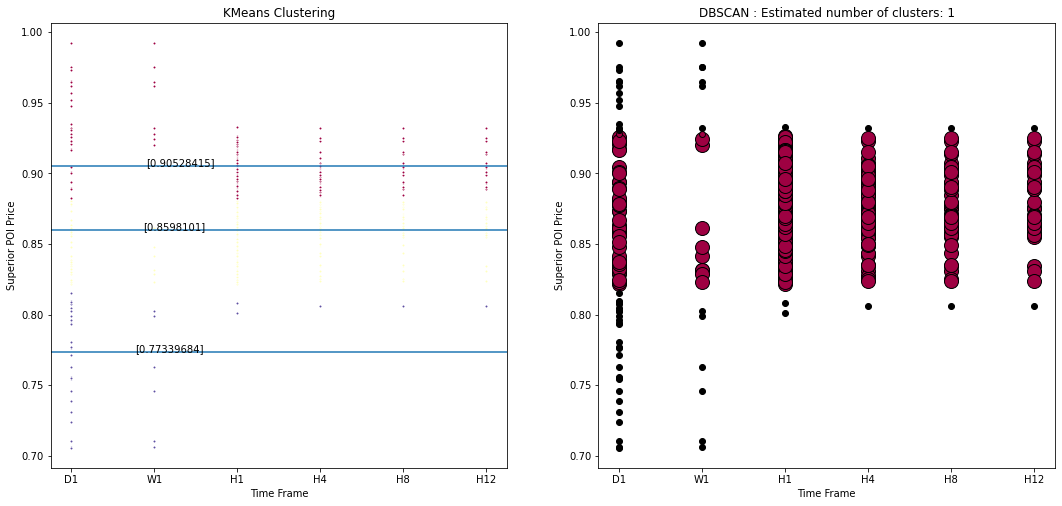

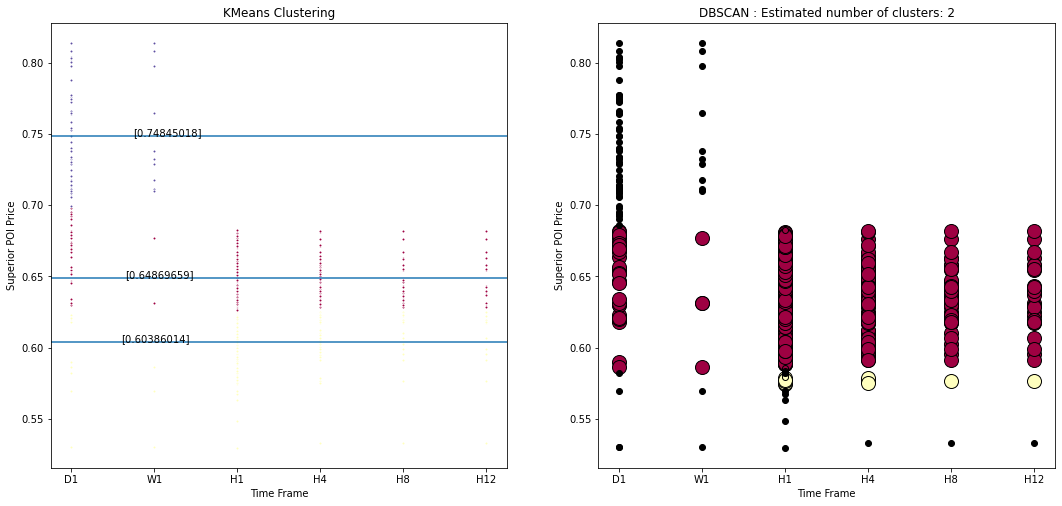

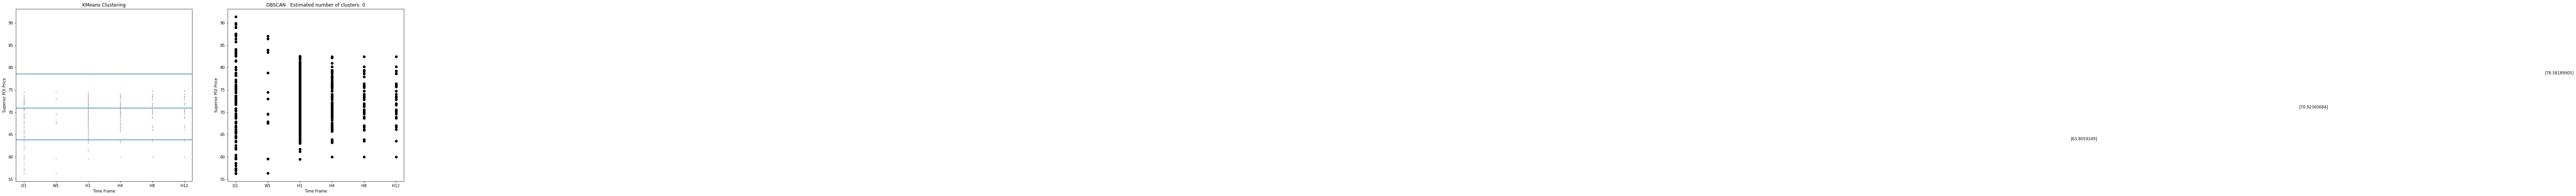

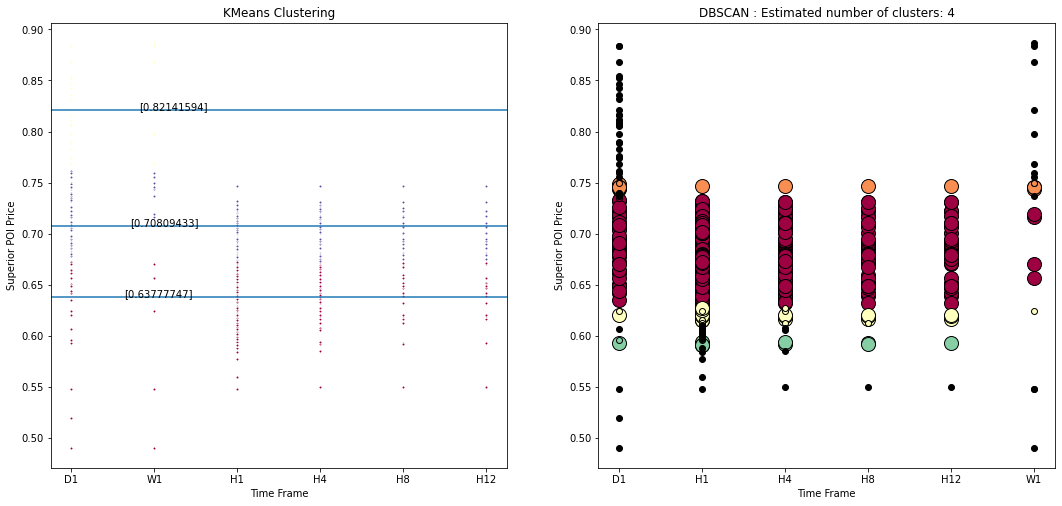

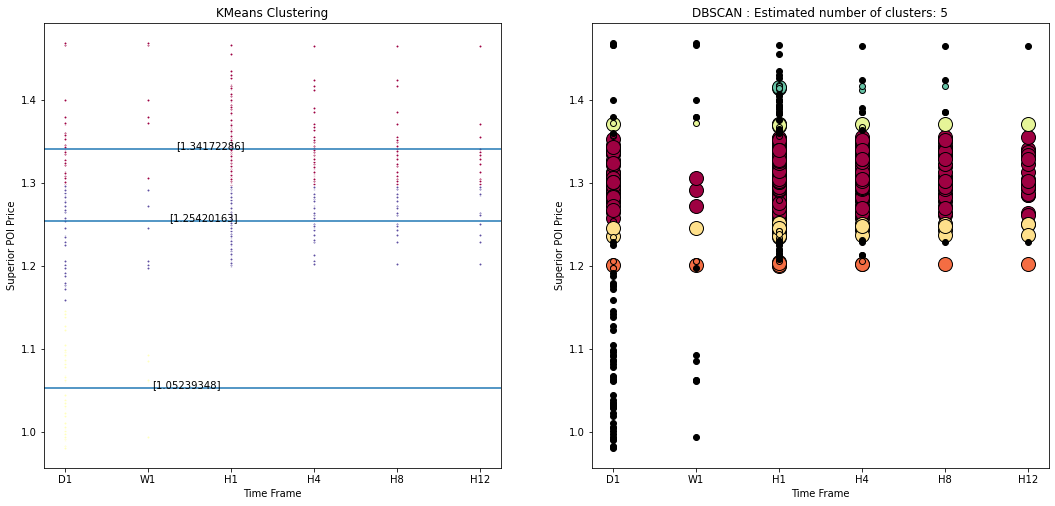

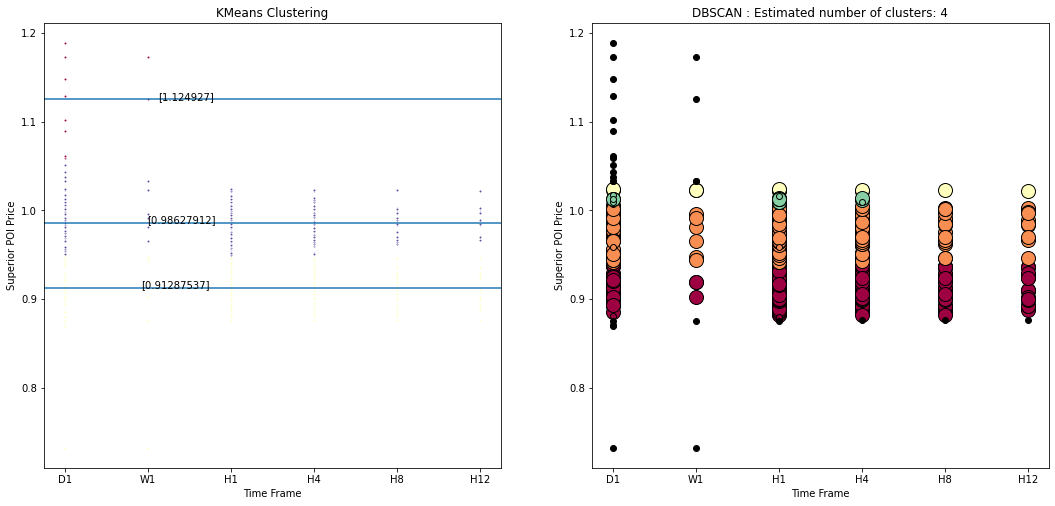

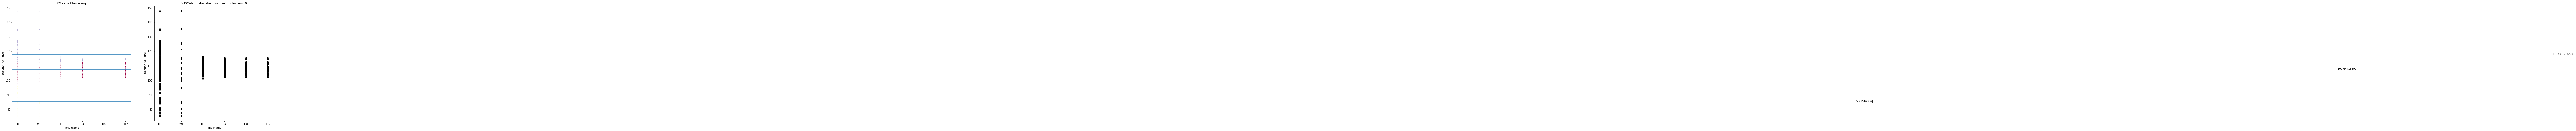

In [75]:
#Visualize By time frame
cnt=0

for tick in ticks:
#    cnt=cnt+1
 #   if cnt  == 2:
  #      break
    dftick = dfdata[dfdata['Ticker'] == tick]

    ########## Remove outliers using zscore (sd of 3 are removed) ########### 
    z_scores = scipy.stats.zscore(dftick['superior_POI_price'])

    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < 3)
    dftick1 = dftick[filtered_entries]

    dftick1.sort_values('superior_POI_price')
    dftick1.reset_index(drop=True,inplace=True)

    X =dftick1['superior_POI_price']
    y = dftick1['TF']
    dffeatures = pd.DataFrame(X)

    #################################################################
    ####  kmeans 
    #################################################################

    ncluster = 3
    kmeans = KMeans(ncluster,random_state = 4,n_init = 12).fit(dffeatures)

    labels = kmeans.labels_
    clust_center = kmeans.cluster_centers_

    #### Eval Metrics ###
    print("Ticker - " + tick)
    print("Kmeans Silhouette Score for {0} clusters:".format(ncluster) + str(metrics.silhouette_score(dffeatures,labels)))
    

    #Add labels as last column
    dftick1.insert(3,'Kmeans_Grouping',kmeans.labels_)
    dftick1 = dftick1.sort_values('Kmeans_Grouping')
    dftick1.reset_index(drop=True,inplace=True)
    #dftick1.to_excel('AUDCAD.xls')

    #################################################################
    ###### DBSCANclustering
    #################################################################

    
    db = DBSCAN(eps=0.003, min_samples=10).fit(dffeatures)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    dblabels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(dblabels)) - (1 if -1 in dblabels else 0)
    n_noise_ = list(dblabels).count(-1)

    print('DBSCAN clustering')
    print("Estimated number of clusters: %d" % n_clusters_)
    print("Estimated number of noise points: %d" % n_noise_)
    #print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(dffeatures, dblabels))

    #Add labels as last column
    dftick1.insert(4,'DBSCAN_Grouping',dblabels)
    dftick1 = dftick1.sort_values('DBSCAN_Grouping')
    dftick1.reset_index(drop=True,inplace=True)
    dftick1.to_excel(tick + '.xls')

    #################################################################
    #Charts
    #################################################################
    
    fig=plt.figure(figsize=(18,18))


    ############### KMeans chart ################
    colors=plt.cm.Spectral(np.linspace(0,1,len(set(labels))))
    ax1 = fig.add_subplot(2,2,1)
    for i in range(len(labels)):
        ax1.plot(y[i],X[i],'w',markerfacecolor=colors[labels[i]],marker='.')
        #ax1.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

    # Title of the plot
    ax1.set_title('KMeans Clustering')
    ax1.set_ylabel('Superior POI Price')
    ax1.set_xlabel('Time Frame')
    for c in clust_center:
        plt.axhline(y=c)
        plt.text(c,c,c)
        
   ############### DBSCAN chart ################
    ax2 = fig.add_subplot(2,2,2)
    # Black removed and is used for noise instead.
    unique_labels = set(dblabels)
    dbcolors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, dbcolors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = dblabels == k
        xy = X[class_member_mask & core_samples_mask]
        yy = y[class_member_mask & core_samples_mask]

        ax2.plot(
            yy,
            xy,
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=14,
        )

        xy = X[class_member_mask & ~core_samples_mask]
        yy = y[class_member_mask & ~core_samples_mask]
        ax2.plot(
            yy,
            xy,
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=6,
        )

        ax2.set_title('DBSCAN : Estimated number of clusters: %d' % n_clusters_)
        ax2.set_ylabel('Superior POI Price')
        ax2.set_xlabel('Time Frame')

# Show the plot
    plt.savefig(tick + '.png')
plt.show()


Ticker - AUDCAD
Kmeans Silhouette Score for 3 clusters:0.5096058939486058
DBSCAN clustering
Estimated number of clusters: 3
Estimated number of noise points: 56


E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - AUDCHF
Kmeans Silhouette Score for 3 clusters:0.5018079042072724
DBSCAN clustering
Estimated number of clusters: 2
Estimated number of noise points: 100


E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - AUDJPY
Kmeans Silhouette Score for 3 clusters:0.5866603462505514
DBSCAN clustering
Estimated number of clusters: 0
Estimated number of noise points: 750


E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - AUDNZD
Kmeans Silhouette Score for 3 clusters:0.5361919395088344
DBSCAN clustering
Estimated number of clusters: 3
Estimated number of noise points: 46


E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - AUDUSD
Kmeans Silhouette Score for 3 clusters:0.5550121609640202
DBSCAN clustering
Estimated number of clusters: 3
Estimated number of noise points: 96


E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - CADCHF
Kmeans Silhouette Score for 3 clusters:0.6608254899474357
DBSCAN clustering
Estimated number of clusters: 3
Estimated number of noise points: 64


E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - CADJPY
Kmeans Silhouette Score for 3 clusters:0.5423720875691523
DBSCAN clustering
Estimated number of clusters: 0
Estimated number of noise points: 771


E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - CHFJPY
Kmeans Silhouette Score for 3 clusters:0.6159881961160301
DBSCAN clustering
Estimated number of clusters: 1
Estimated number of noise points: 793


E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - EURAUD
Kmeans Silhouette Score for 3 clusters:0.7713087872227017
DBSCAN clustering
Estimated number of clusters: 4
Estimated number of noise points: 98


E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - EURCAD
Kmeans Silhouette Score for 3 clusters:0.5214820190105004
DBSCAN clustering
Estimated number of clusters: 4
Estimated number of noise points: 36


E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - EURCHF
Kmeans Silhouette Score for 3 clusters:0.8156500512757104
DBSCAN clustering
Estimated number of clusters: 3
Estimated number of noise points: 84


E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - EURGBP
Kmeans Silhouette Score for 3 clusters:0.6437372577738322
DBSCAN clustering
Estimated number of clusters: 2
Estimated number of noise points: 88


E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - EURJPY
Kmeans Silhouette Score for 3 clusters:0.5776488896738051
DBSCAN clustering
Estimated number of clusters: 0
Estimated number of noise points: 678


E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - EURUSD
Kmeans Silhouette Score for 3 clusters:0.7266080255172297
DBSCAN clustering
Estimated number of clusters: 7
Estimated number of noise points: 82


E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - EURNZD
Kmeans Silhouette Score for 3 clusters:0.4988557085953907
DBSCAN clustering
Estimated number of clusters: 7
Estimated number of noise points: 80


E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - GBPAUD
Kmeans Silhouette Score for 3 clusters:0.7504546845334308
DBSCAN clustering
Estimated number of clusters: 5
Estimated number of noise points: 146


E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - GBPCAD
Kmeans Silhouette Score for 3 clusters:0.6403297611029286
DBSCAN clustering
Estimated number of clusters: 4
Estimated number of noise points: 115


E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - GBPCHF
Kmeans Silhouette Score for 3 clusters:0.5983998987381987
DBSCAN clustering
Estimated number of clusters: 3
Estimated number of noise points: 100


E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - GBPJPY
Kmeans Silhouette Score for 3 clusters:0.6310712665619767
DBSCAN clustering
Estimated number of clusters: 0
Estimated number of noise points: 658


E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - GBPNZD
Kmeans Silhouette Score for 3 clusters:0.53477037747764
DBSCAN clustering
Estimated number of clusters: 5
Estimated number of noise points: 90


E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - GBPUSD
Kmeans Silhouette Score for 3 clusters:0.6220883647422727
DBSCAN clustering
Estimated number of clusters: 7
Estimated number of noise points: 78


<ipython-input-81-5eec7c7edca3>:74: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure(figsize=(18,18))
E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - NZDCAD
Kmeans Silhouette Score for 3 clusters:0.5368622900313588
DBSCAN clustering
Estimated number of clusters: 1
Estimated number of noise points: 60


<ipython-input-81-5eec7c7edca3>:74: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure(figsize=(18,18))
E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - NZDCHF
Kmeans Silhouette Score for 3 clusters:0.5597615562592384
DBSCAN clustering
Estimated number of clusters: 2
Estimated number of noise points: 79


<ipython-input-81-5eec7c7edca3>:74: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure(figsize=(18,18))
E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - NZDJPY
Kmeans Silhouette Score for 3 clusters:0.5681057666491913
DBSCAN clustering
Estimated number of clusters: 0
Estimated number of noise points: 645


<ipython-input-81-5eec7c7edca3>:74: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure(figsize=(18,18))
E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - NZDUSD
Kmeans Silhouette Score for 3 clusters:0.5700496481274986
DBSCAN clustering
Estimated number of clusters: 4
Estimated number of noise points: 74


<ipython-input-81-5eec7c7edca3>:74: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure(figsize=(18,18))
E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - USDCAD
Kmeans Silhouette Score for 3 clusters:0.5777017050219152
DBSCAN clustering
Estimated number of clusters: 5
Estimated number of noise points: 123


<ipython-input-81-5eec7c7edca3>:74: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure(figsize=(18,18))
E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - USDCHF
Kmeans Silhouette Score for 3 clusters:0.6782477680510278
DBSCAN clustering
Estimated number of clusters: 4
Estimated number of noise points: 27


<ipython-input-81-5eec7c7edca3>:74: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure(figsize=(18,18))
E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Ticker - USDJPY
Kmeans Silhouette Score for 3 clusters:0.6212793962317787
DBSCAN clustering
Estimated number of clusters: 0
Estimated number of noise points: 701


<ipython-input-81-5eec7c7edca3>:74: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure(figsize=(18,18))
E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


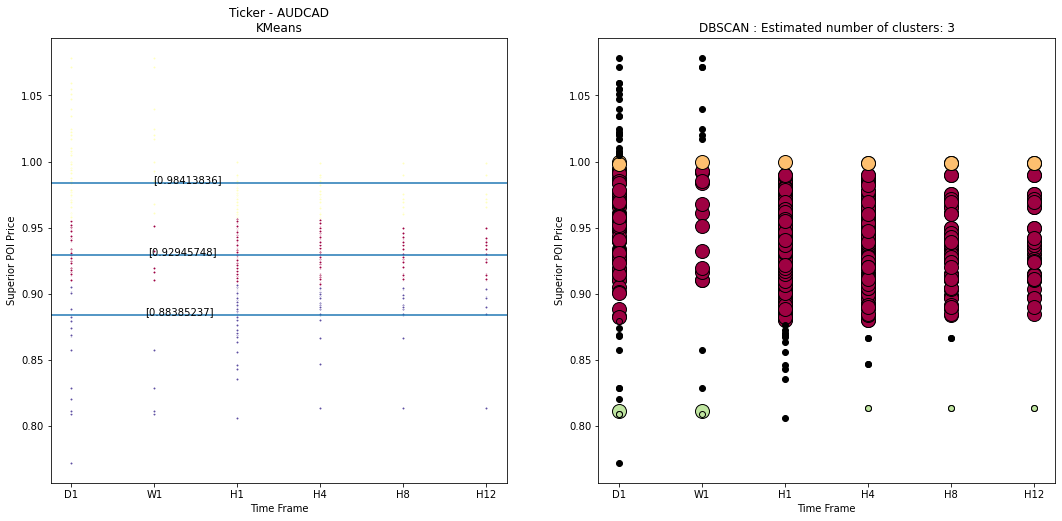

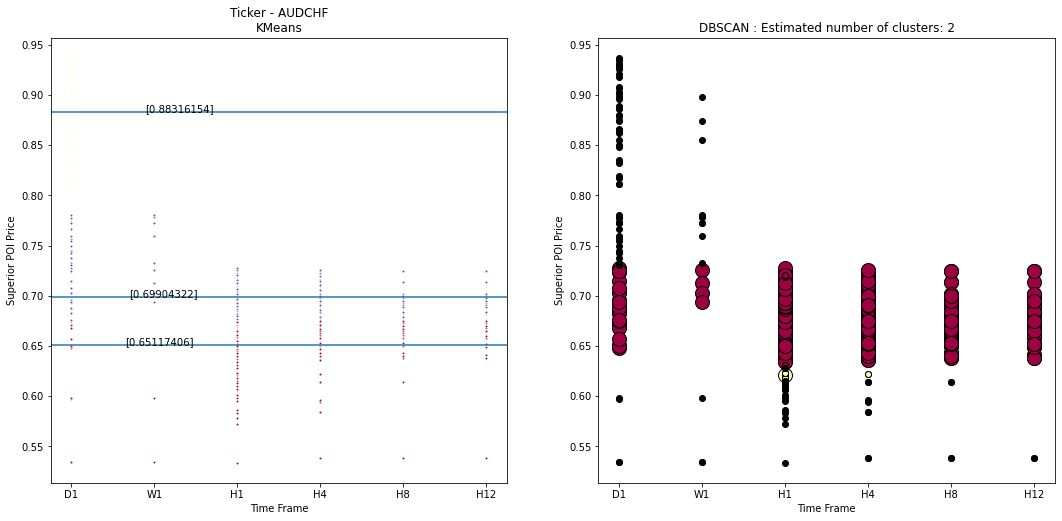

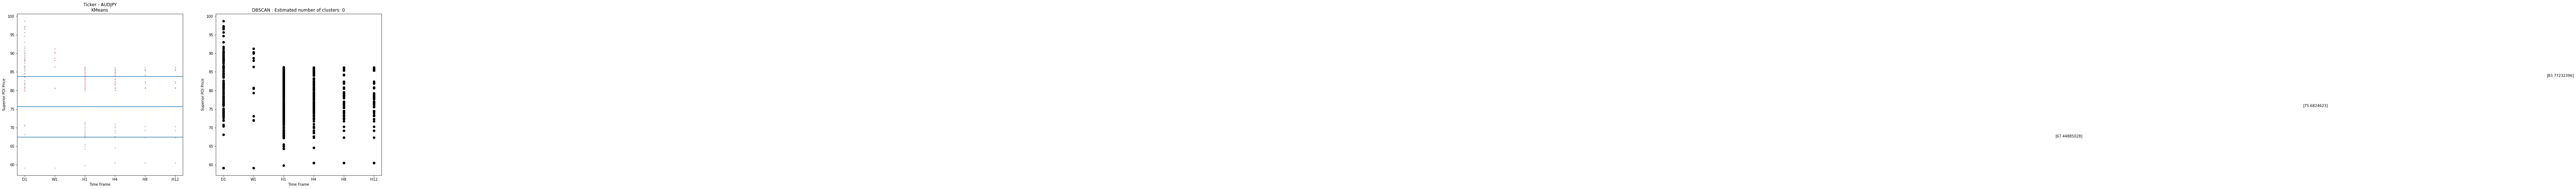

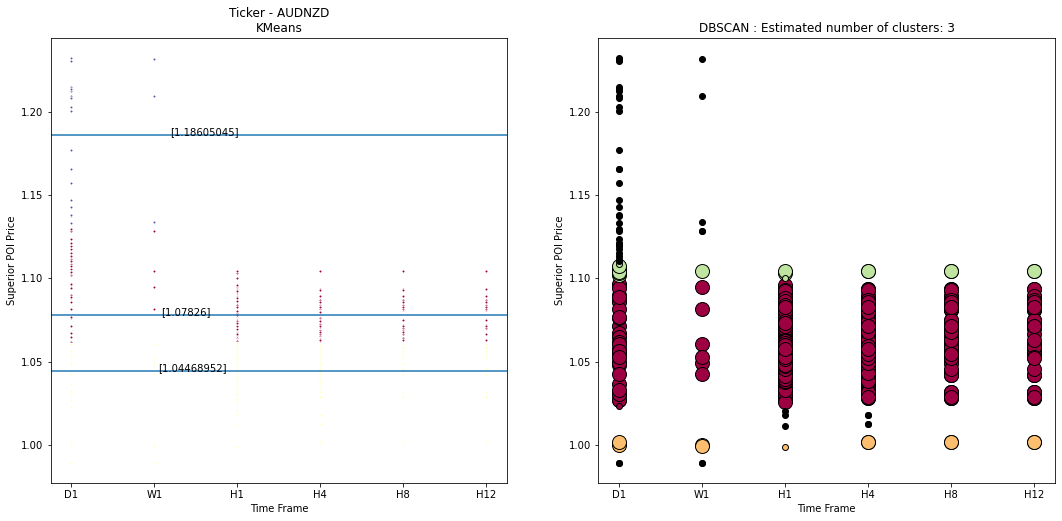

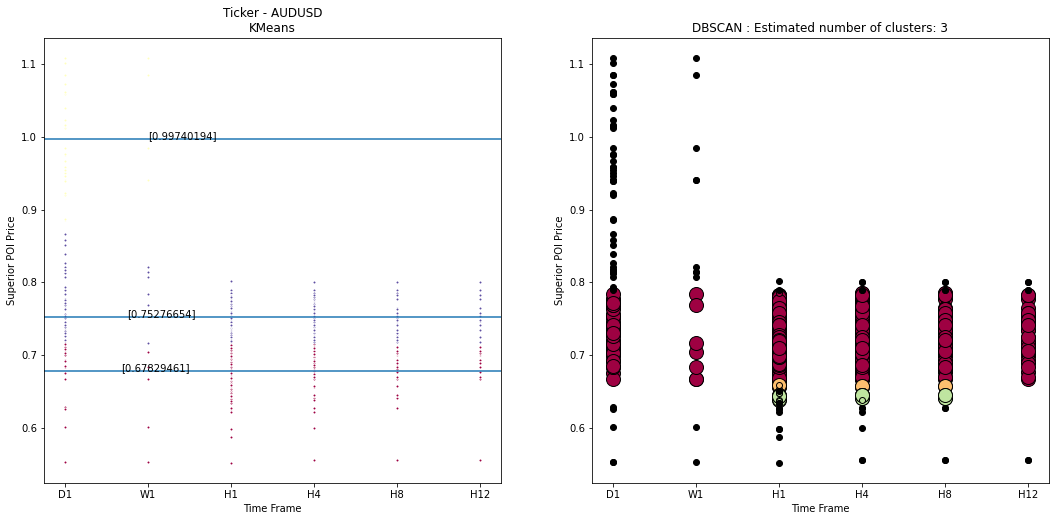

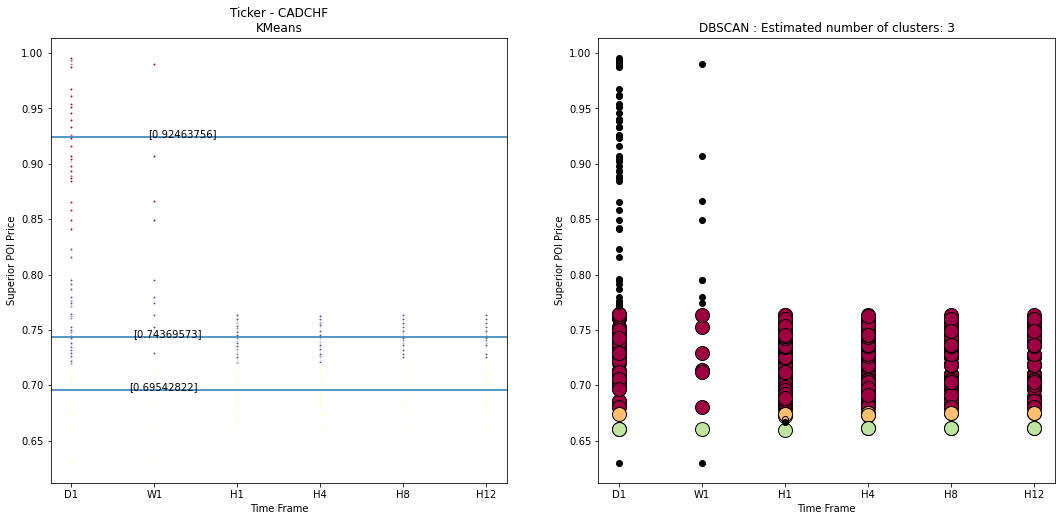

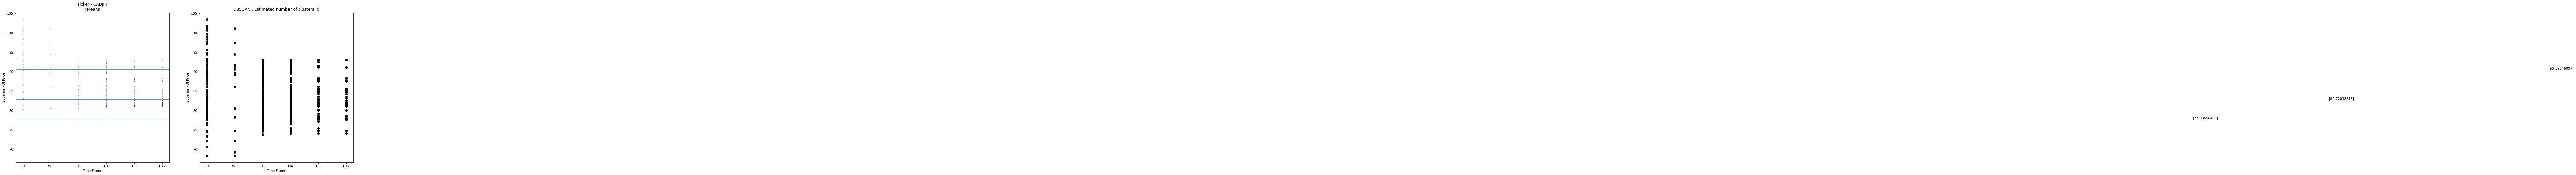

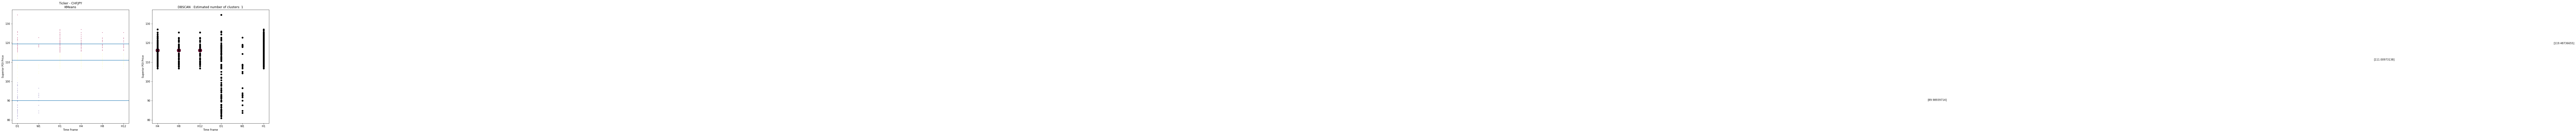

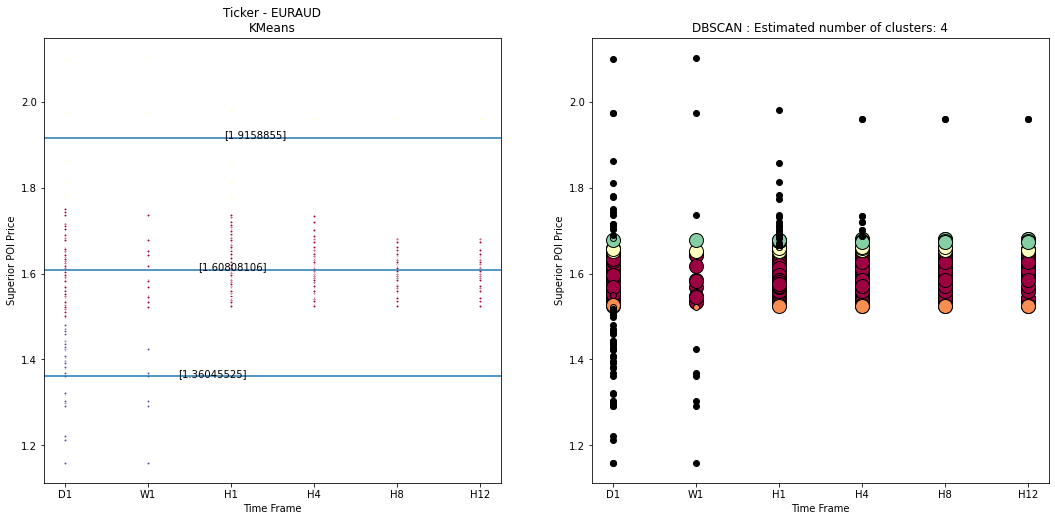

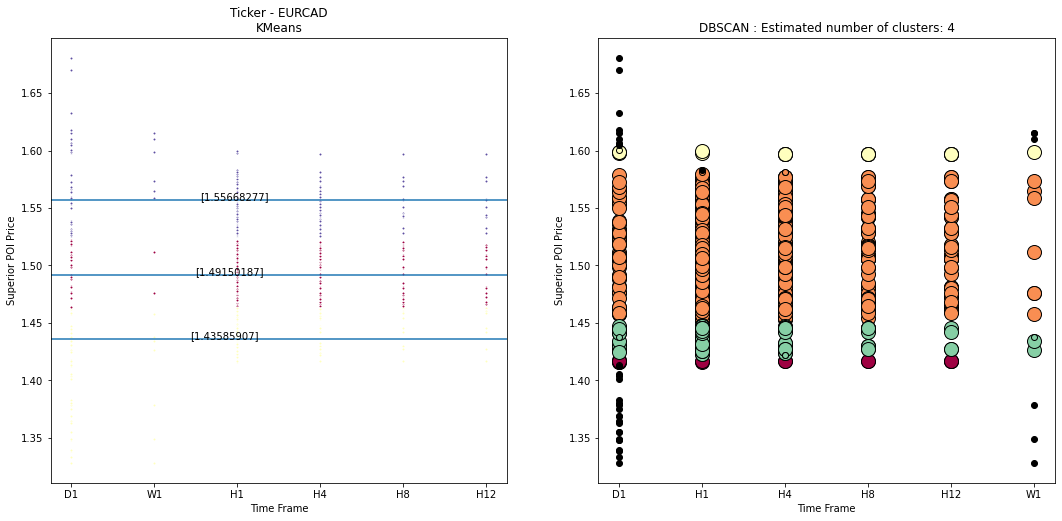

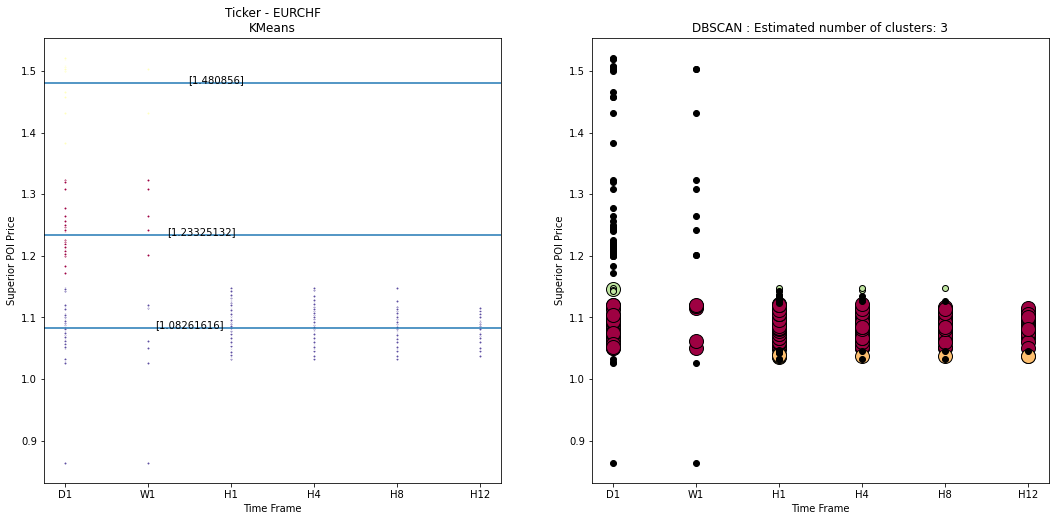

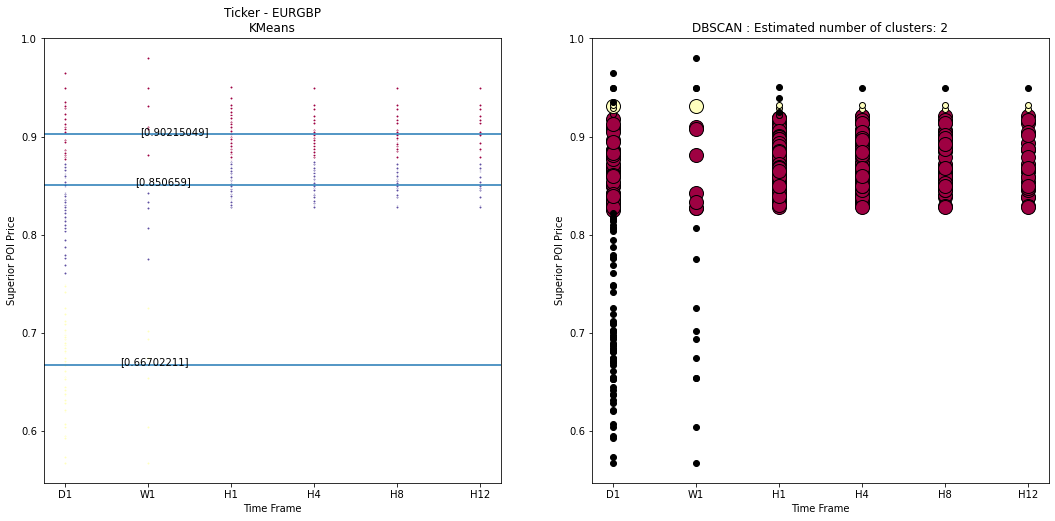

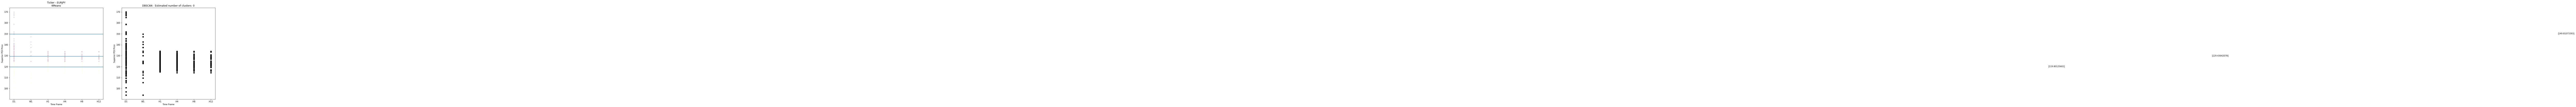

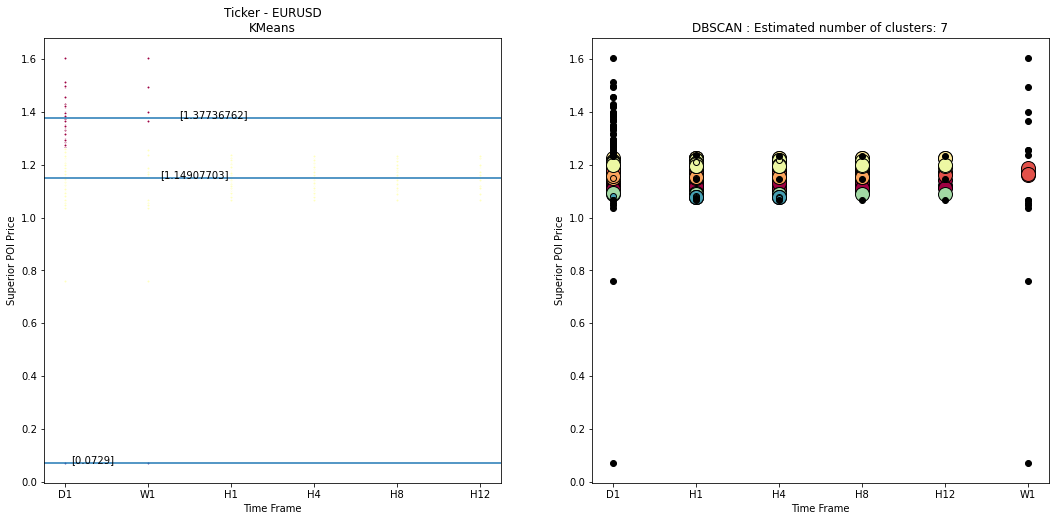

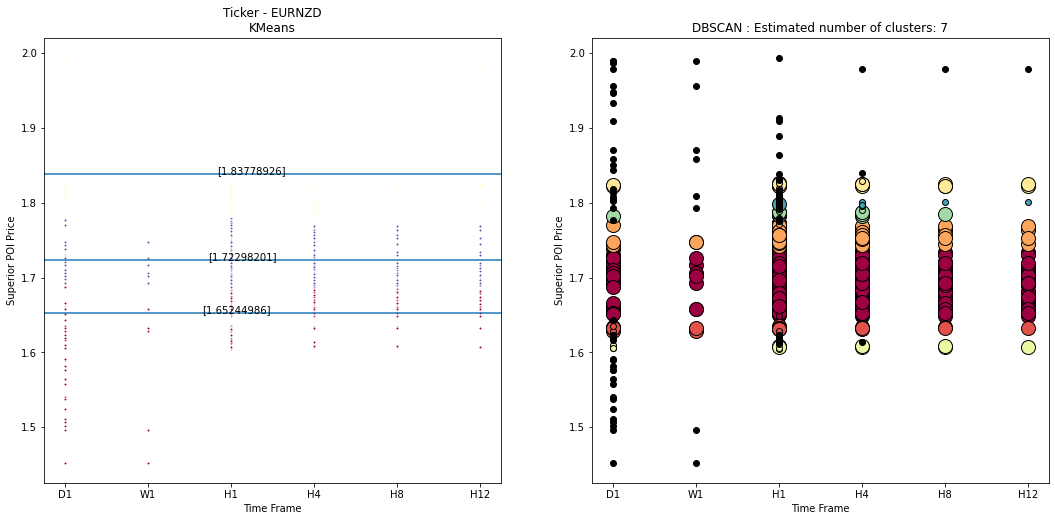

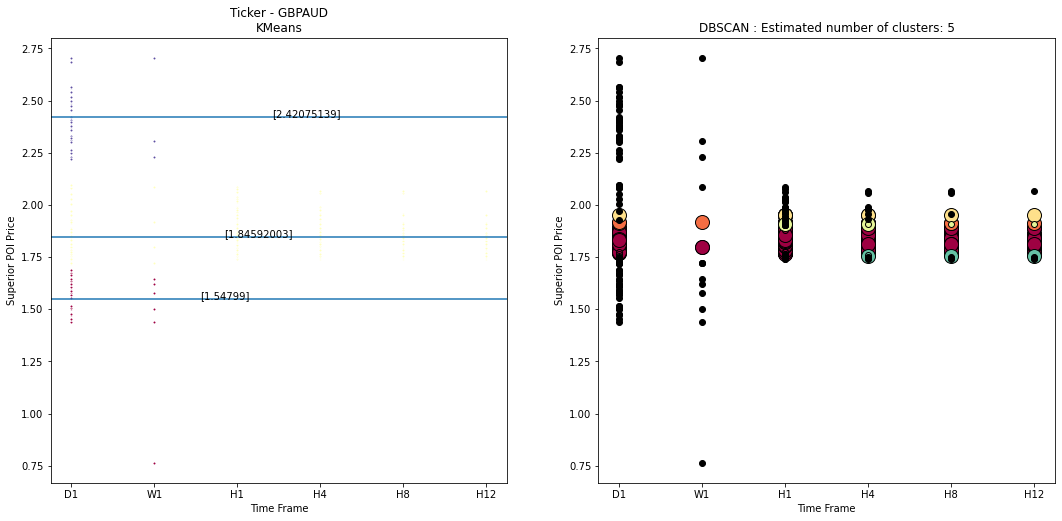

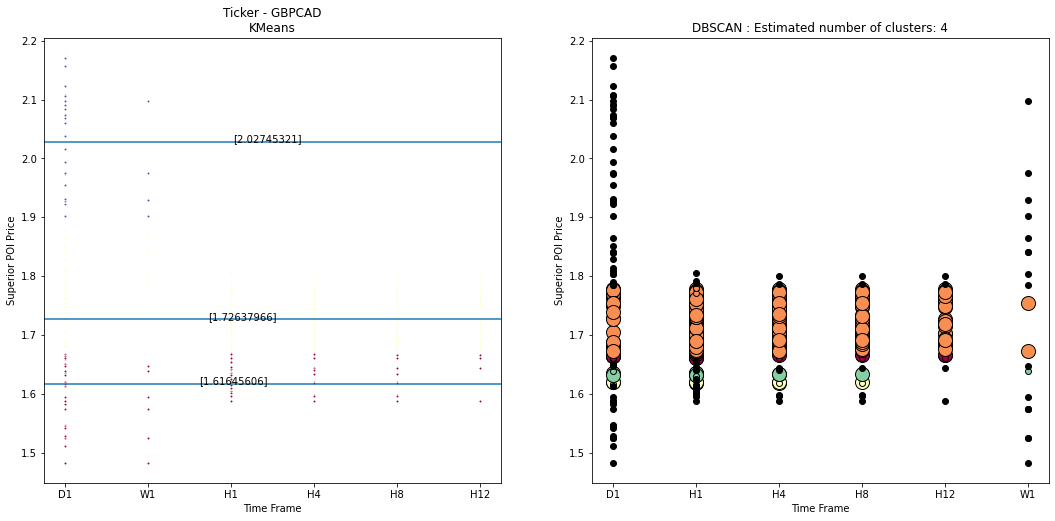

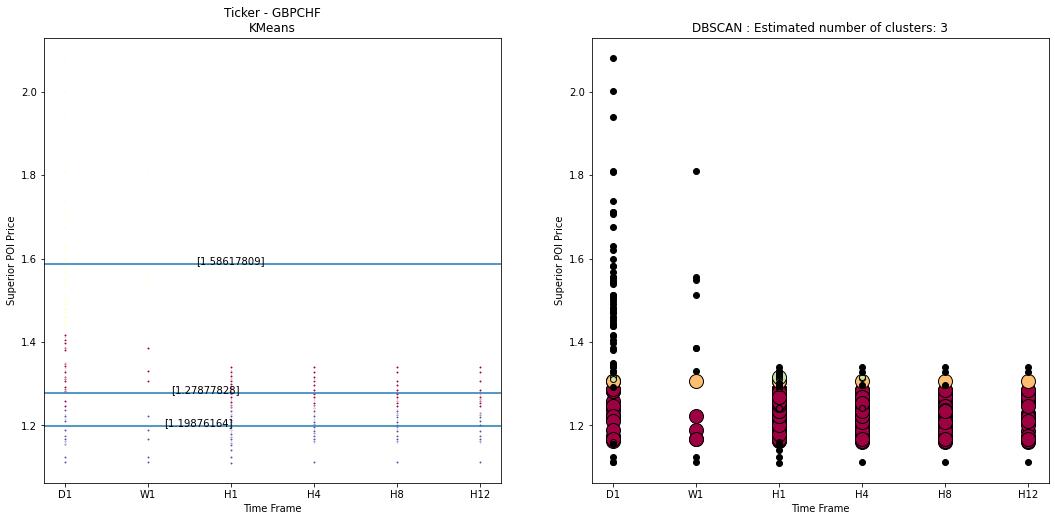

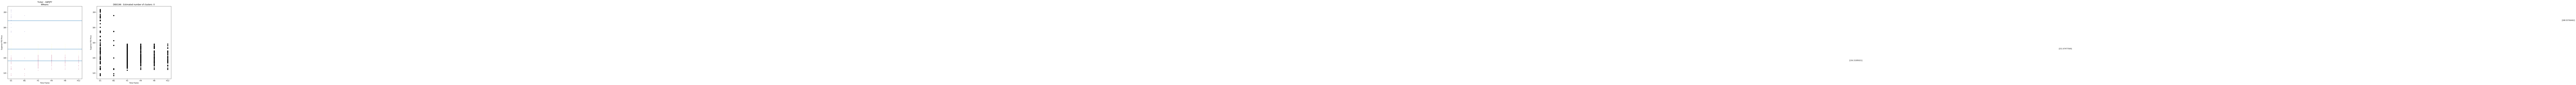

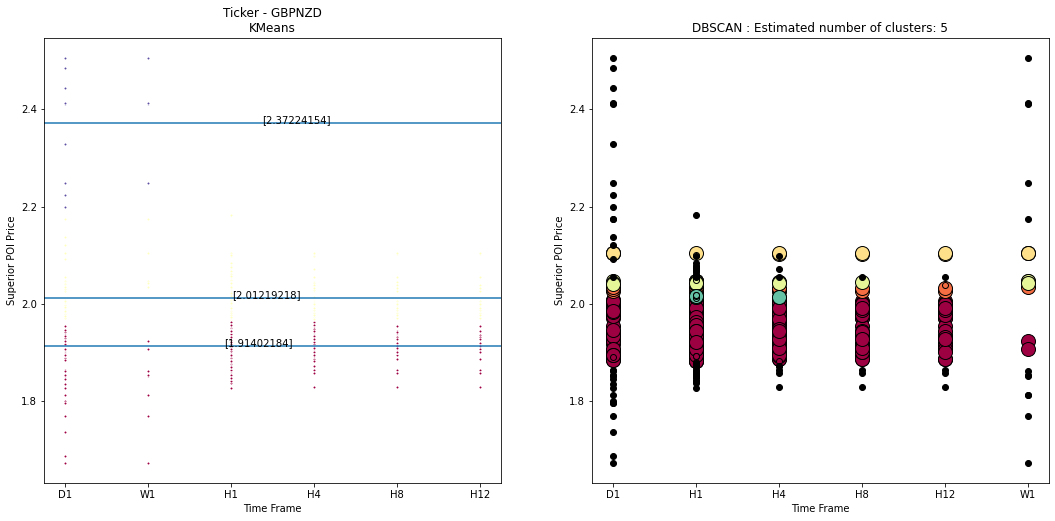

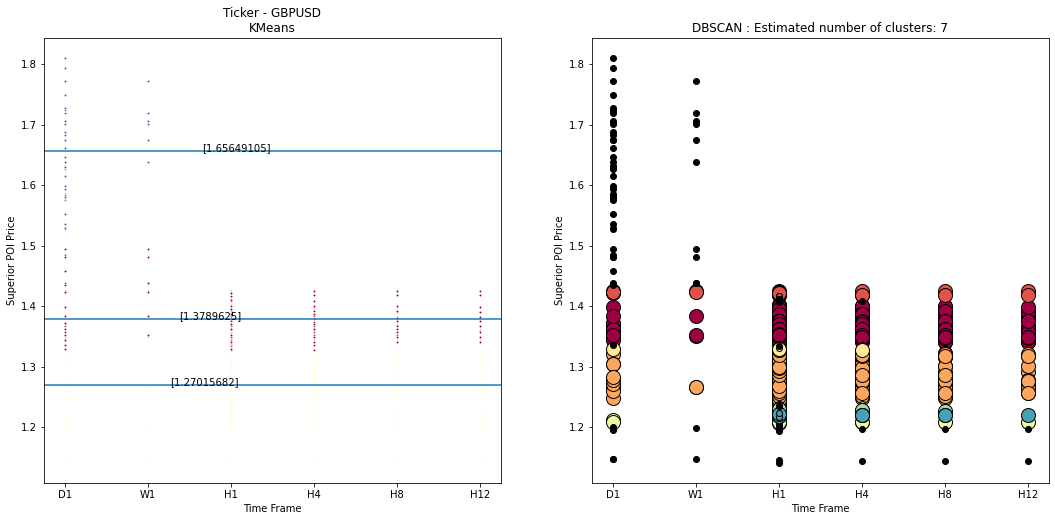

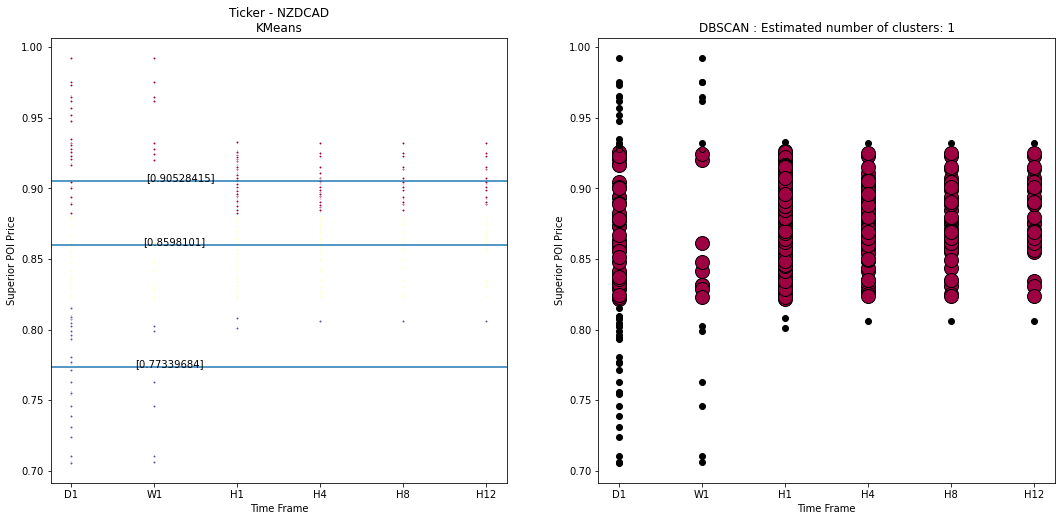

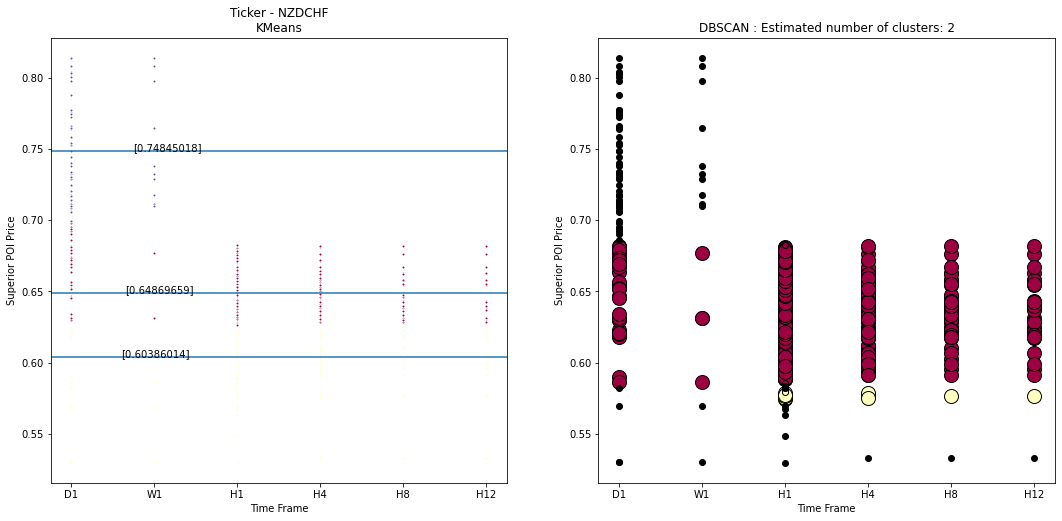

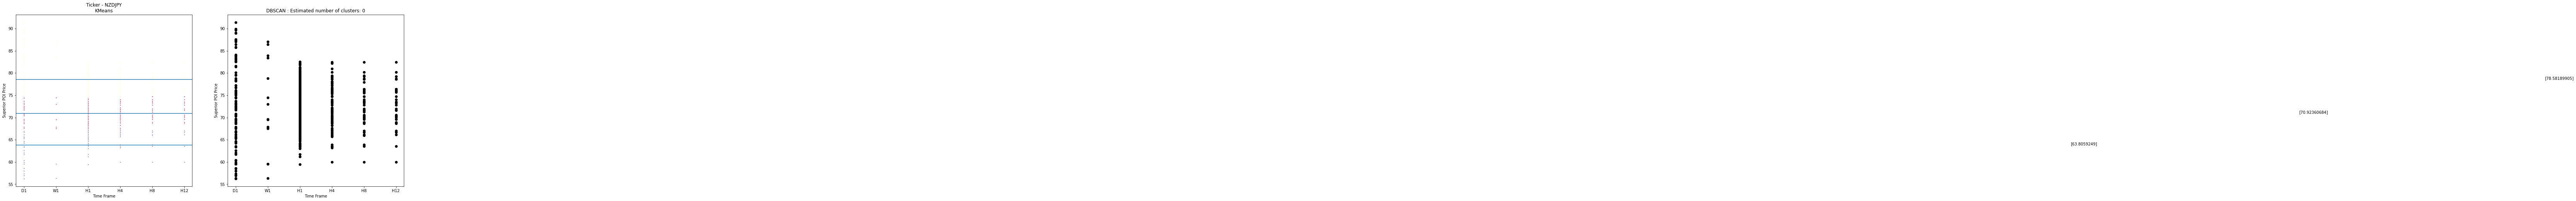

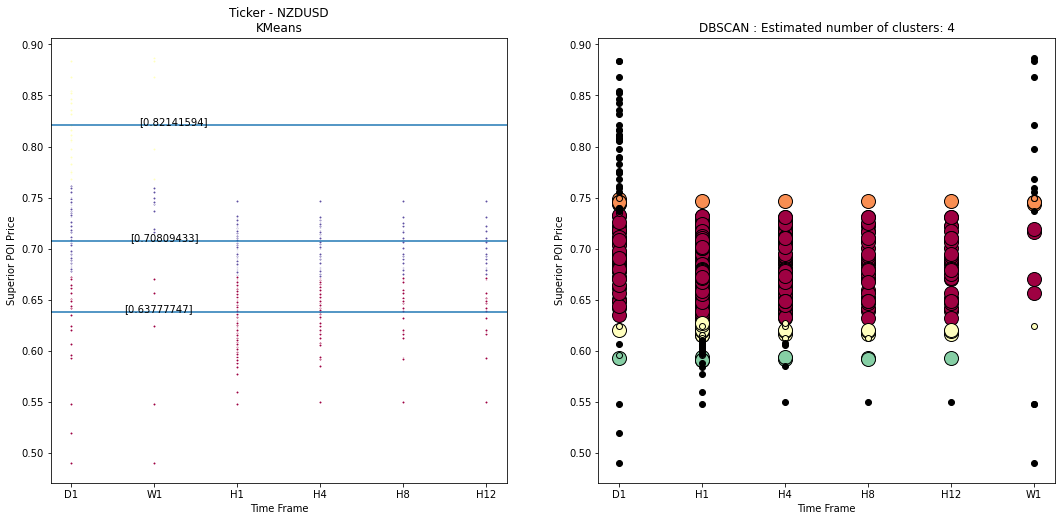

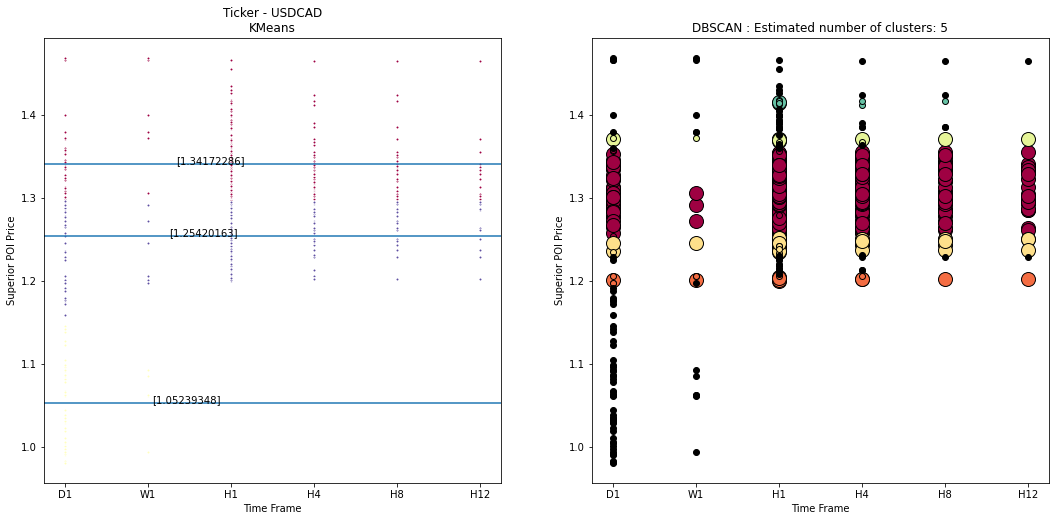

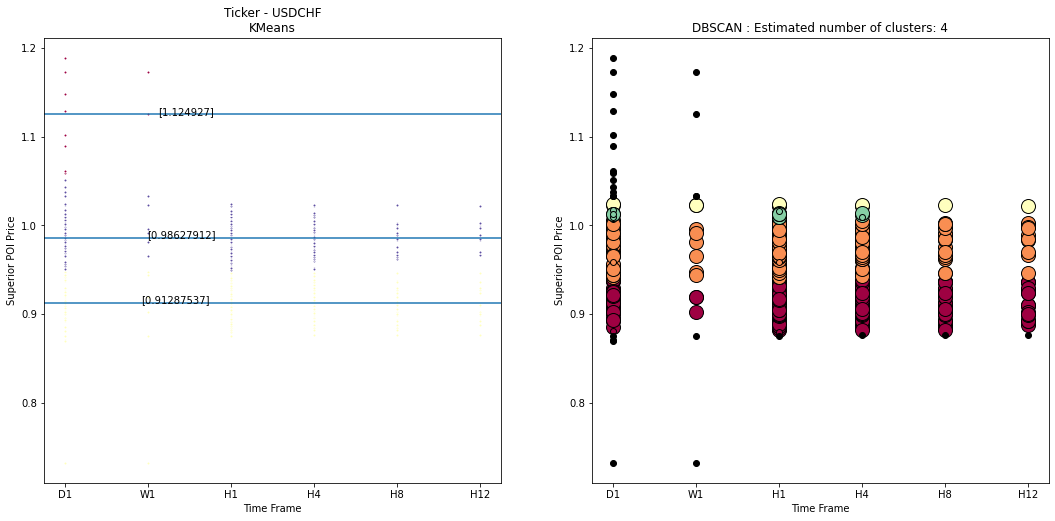

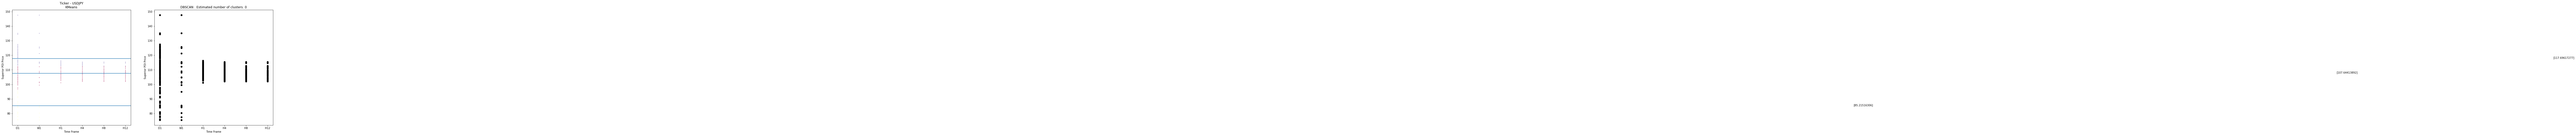

In [81]:
#Visualize By time frame
cnt=0

for tick in ticks:
  #  cnt=cnt+1
  #  if cnt  == 3:
   #     break
    dftick = dfdata[dfdata['Ticker'] == tick]

    ########## Remove outliers using zscore (sd of 3 are removed) ########### 
    z_scores = scipy.stats.zscore(dftick['superior_POI_price'])

    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < 3)
    dftick1 = dftick[filtered_entries]

    dftick1.sort_values('superior_POI_price')
    dftick1.reset_index(drop=True,inplace=True)

    X =dftick1['superior_POI_price']
    y = dftick1['TF']
    dffeatures = pd.DataFrame(X)

    #################################################################
    ####  kmeans 
    #################################################################

    ncluster = 3
    kmeans = KMeans(ncluster,random_state = 4,n_init = 12).fit(dffeatures)

    labels = kmeans.labels_
    clust_center = kmeans.cluster_centers_

    #### Eval Metrics ###
    print("Ticker - " + tick)
    print("Kmeans Silhouette Score for {0} clusters:".format(ncluster) + str(metrics.silhouette_score(dffeatures,labels)))
    

    #Add labels as last column
    dftick1.insert(3,'Kmeans_Grouping',kmeans.labels_)
    dftick1 = dftick1.sort_values('Kmeans_Grouping')
    dftick1.reset_index(drop=True,inplace=True)
    #dftick1.to_excel('AUDCAD.xls')

    #################################################################
    ###### DBSCANclustering
    #################################################################

    
    db = DBSCAN(eps=0.003, min_samples=10).fit(dffeatures)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    dblabels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(dblabels)) - (1 if -1 in dblabels else 0)
    n_noise_ = list(dblabels).count(-1)

    print('DBSCAN clustering')
    print("Estimated number of clusters: %d" % n_clusters_)
    print("Estimated number of noise points: %d" % n_noise_)
    #print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(dffeatures, dblabels))

    #Add labels as last column
    dftick1.insert(4,'DBSCAN_Grouping',dblabels)
    dftick1 = dftick1.sort_values('DBSCAN_Grouping')
    dftick1.reset_index(drop=True,inplace=True)
    dftick1.to_excel(tick + '.xls')

    #################################################################
    #Charts
    #################################################################
    
    fig=plt.figure(figsize=(18,18))


    ############### KMeans chart ################
    colors=plt.cm.Spectral(np.linspace(0,1,len(set(labels))))
    ax1 = fig.add_subplot(2,2,1)
    for i in range(len(labels)):
        ax1.plot(y[i],X[i],'w',markerfacecolor=colors[labels[i]],marker='.')
        #ax1.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

    # Title of the plot
    
    ax1.set_title('Ticker - ' + tick + '\nKMeans')
    ax1.set_ylabel('Superior POI Price')
    ax1.set_xlabel('Time Frame')
    for c in clust_center:
        plt.axhline(y=c)
        plt.text(c,c,c)
        
   ############### DBSCAN chart ################
    ax2 = fig.add_subplot(2,2,2)
    # Black removed and is used for noise instead.
    unique_labels = set(dblabels)
    dbcolors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, dbcolors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = dblabels == k
        xy = X[class_member_mask & core_samples_mask]
        yy = y[class_member_mask & core_samples_mask]

        ax2.plot(
            yy,
            xy,
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=14,
        )

        xy = X[class_member_mask & ~core_samples_mask]
        yy = y[class_member_mask & ~core_samples_mask]
        ax2.plot(
            yy,
            xy,
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=6,
        )

        ax2.set_title('DBSCAN : Estimated number of clusters: %d' % n_clusters_)
        ax2.set_ylabel('Superior POI Price')
        ax2.set_xlabel('Time Frame')

# Show the plot
        
    plt.savefig(tick + '.png')
    
plt.show()


# kMeans Clustering model

Ticker - AUDCAD
Kmeans Silhouette Score for 3 clusters:0.5096058939486058


E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


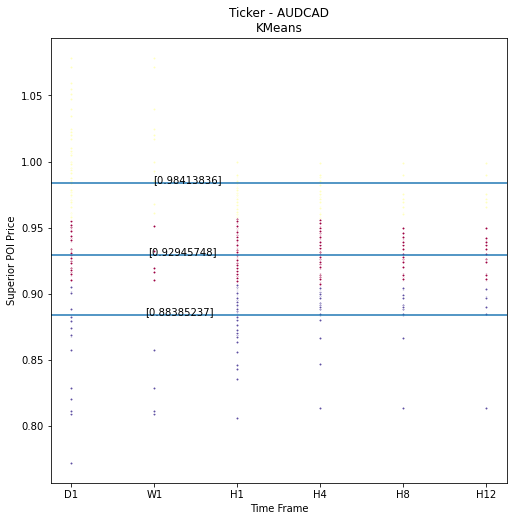

In [4]:
tick = 'AUDCAD'
dftick = dfdata[dfdata['Ticker'] == tick]

########## Remove outliers using zscore (sd of 3 are removed) ########### 
z_scores = scipy.stats.zscore(dftick['superior_POI_price'])

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
dftick1 = dftick[filtered_entries]

dftick1.sort_values('superior_POI_price')
dftick1.reset_index(drop=True,inplace=True)

X =dftick1['superior_POI_price']
y = dftick1['TF']
dffeatures = pd.DataFrame(X)

#################################################################
####  kmeans 
#################################################################

ncluster = 3
kmeans = KMeans(ncluster,random_state = 4,n_init = 12).fit(dffeatures)

labels = kmeans.labels_
clust_center = kmeans.cluster_centers_

#### Eval Metrics ###
print("Ticker - " + tick)
print("Kmeans Silhouette Score for {0} clusters:".format(ncluster) + str(metrics.silhouette_score(dffeatures,labels)))

#################################################################
#Charts
#################################################################

fig=plt.figure(figsize=(18,18))

############### KMeans chart ################
colors=plt.cm.Spectral(np.linspace(0,1,len(set(labels))))
ax1 = fig.add_subplot(2,2,1)
for i in range(len(labels)):
    ax1.plot(y[i],X[i],'w',markerfacecolor=colors[labels[i]],marker='.')
    #ax1.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot

ax1.set_title('Ticker - ' + tick + '\nKMeans')
ax1.set_ylabel('Superior POI Price')
ax1.set_xlabel('Time Frame')
for c in clust_center:
    plt.axhline(y=c)
    plt.text(c,c,c)

plt.show()


# Elbow method to find optimal number of clusters-  kmeans

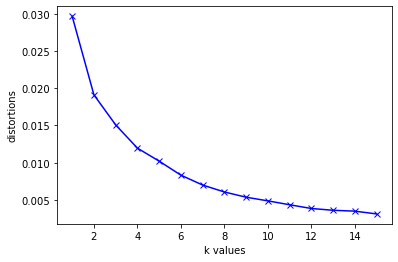

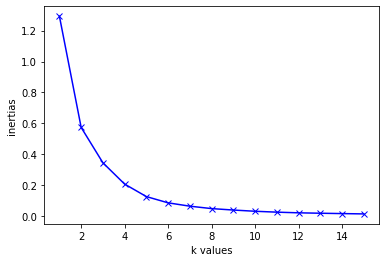

In [13]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
k=range(1,16)


#Find distortion and inertia
for nclus in k:
    kmean = KMeans(nclus,random_state = 4,n_init = 12).fit(dffeatures)

    distortions.append(sum(np.min(cdist(dffeatures, kmean.cluster_centers_,
                                        'euclidean'), axis=1)) / dffeatures.shape[0])
    inertias.append(kmean.inertia_)

    #Dictionary storing k value as key and distance as value
    mapping1[nclus] = sum(np.min(cdist(dffeatures, kmean.cluster_centers_,
                                   'euclidean'), axis=1)) / dffeatures.shape[0]
    mapping2[nclus] = kmean.inertia_


###### plot using distortion
plt.plot(k,distortions,'bx-')
plt.xlabel('k values')
plt.ylabel('distortions')
plt.show()
plt.savefig('elbow curve.png')

######## plot using inertia
plt.plot(k,inertias,'bx-')
plt.xlabel('k values')
plt.ylabel('inertias')
plt.show()

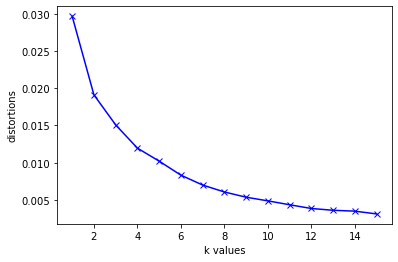

In [15]:
plt.plot(k,distortions,'bx-')
plt.xlabel('k values')
plt.ylabel('distortions')
plt.savefig('elbow curve.png')
plt.show()


# Find optimal K value - by silhouette score


Ticker - AUDCAD
Kmeans Silhouette Score for 2 clusters:0.5309706050510116
Ticker - AUDCAD
Kmeans Silhouette Score for 3 clusters:0.5096058939486058
Ticker - AUDCAD
Kmeans Silhouette Score for 4 clusters:0.5373354043816759
Ticker - AUDCAD
Kmeans Silhouette Score for 5 clusters:0.558478061363038
Ticker - AUDCAD
Kmeans Silhouette Score for 6 clusters:0.5400836474716991
Ticker - AUDCAD
Kmeans Silhouette Score for 7 clusters:0.5298633037397338
Ticker - AUDCAD
Kmeans Silhouette Score for 8 clusters:0.5458503879398829
Ticker - AUDCAD
Kmeans Silhouette Score for 9 clusters:0.5521206415054432
Ticker - AUDCAD
Kmeans Silhouette Score for 10 clusters:0.5522045918167582
Ticker - AUDCAD
Kmeans Silhouette Score for 11 clusters:0.5587299280175536
Ticker - AUDCAD
Kmeans Silhouette Score for 12 clusters:0.5687245478367359
Ticker - AUDCAD
Kmeans Silhouette Score for 13 clusters:0.5651978154904703
Ticker - AUDCAD
Kmeans Silhouette Score for 14 clusters:0.5643954171926187


E:\softwares\Anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


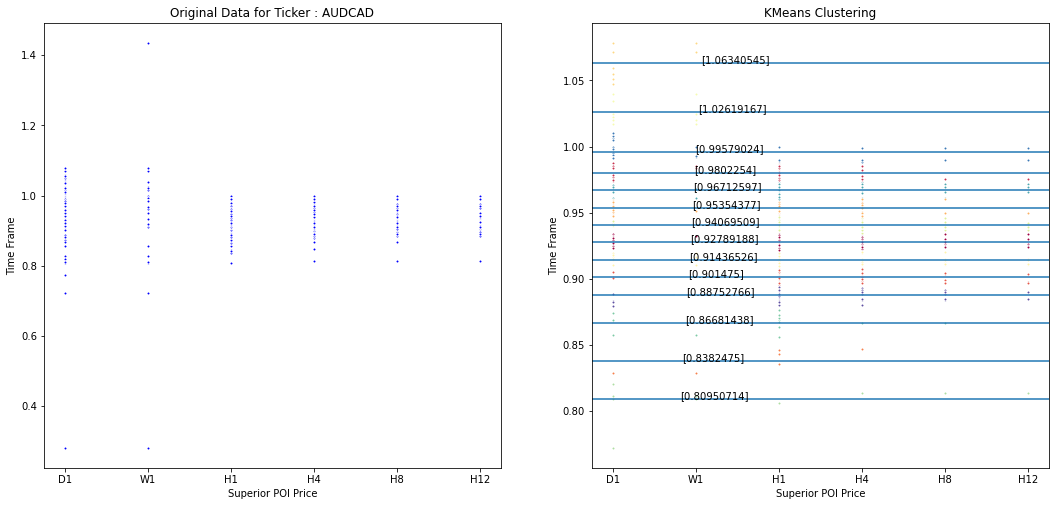

In [3]:

cnt=0

for tick in ticks:
    cnt=cnt+1
    if cnt  == 2:
        break
    dftick = dfdata[dfdata['Ticker'] == tick]

    ########## Remove outliers using zscore (sd of 3 are removed) ########### 
    z_scores = scipy.stats.zscore(dftick['superior_POI_price'])

    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < 3)
    dftick1 = dftick[filtered_entries]

    dftick1.sort_values('superior_POI_price')
    dftick1.reset_index(drop=True,inplace=True)

    X =dftick1['superior_POI_price']
    y = dftick1['TF']

    ################# Apply kmeans #################
    for n in range(2,15):
        
        ncluster = n 
        dffeatures = pd.DataFrame(X)
        kmeans = KMeans(ncluster,random_state = 4,n_init = 12).fit(dffeatures)

        labels = kmeans.labels_
        clust_center = kmeans.cluster_centers_

        #### Eval Metrics ###
        print("Ticker - " + tick)
        print("Kmeans Silhouette Score for {0} clusters:".format(ncluster) + str(metrics.silhouette_score(dffeatures,labels)))
    

    #Add labels as last column
    dftick1.insert(3,'Group',kmeans.labels_)
    dftick1 = dftick1.sort_values('Group')
    dftick1.reset_index(drop=True,inplace=True)
    #dftick1.to_excel('AUDCAD.xls')

    fig=plt.figure(figsize=(18,18))

    ############### charts ################
    #Plot original
    ax= fig.add_subplot(2,2,1)
    ax.plot(dftick['TF'],dftick['superior_POI_price'],'w',markerfacecolor='b',marker='.')
    ax.set_ylabel('Time Frame')
    ax.set_xlabel('Superior POI Price')

    # Title of the plot
    ax.set_title('Original Data for Ticker : ' + tick)


    #Plot kmeans chart
    colors=plt.cm.Spectral(np.linspace(0,1,len(set(labels))))
    ax1 = fig.add_subplot(2,2,2)
    for i in range(len(labels)):
        ax1.plot(y[i],X[i],'w',markerfacecolor=colors[labels[i]],marker='.')
        #ax1.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

    # Title of the plot
    ax1.set_title('KMeans Clustering')
    ax1.set_ylabel('Time Frame')
    ax1.set_xlabel('Superior POI Price')
    for c in clust_center:
        plt.axhline(y=c)
        plt.text(c,c,c)
# Show the plot
    #plt.savefig(tick + '.png')
plt.show()


# Clustering with price and TF - Numeric and categorical together

In [40]:
tick = 'AUDCAD'
dftick = dfdata[dfdata['Ticker'] == tick]

########## Remove outliers using zscore (sd of 3 are removed) ########### 
z_scores = scipy.stats.zscore(dftick['superior_POI_price'])

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
dftick1 = dftick[filtered_entries]

dftick1.sort_values('superior_POI_price')
dftick1.reset_index(drop=True,inplace=True)

X =dftick1[['superior_POI_price','TF']]
y = dftick1['Datetime']


In [41]:
#One hot encode TF

dfX =pd.get_dummies(dftick1[['superior_POI_price','TF']])
dfX

,superior_POI_price,TF_D1,TF_H1,TF_H12,TF_H4,TF_H8,TF_W1
0,0.93369,1,0,0,0,0,0
1,0.91033,1,0,0,0,0,0
2,0.94157,1,0,0,0,0,0
3,0.92673,1,0,0,0,0,0
4,0.97557,1,0,0,0,0,0
...,...,...,...,...,...,...,...
805,0.88489,0,0,1,0,0,0
806,0.91407,0,0,1,0,0,0
807,0.89025,0,0,1,0,0,0
808,0.92377,0,0,1,0,0,0


Ticker - AUDCAD
Kmeans Silhouette Score for 3 clusters:0.7480094301512415
[9.43364444e-01 4.11111111e-01 6.10622664e-16 1.96296296e-01
 3.05311332e-16 3.00000000e-01 9.25925926e-02]
[ 9.27452750e-01 -1.66533454e-16  1.00000000e+00  6.93889390e-17
  4.99600361e-16  2.22044605e-16 -3.46944695e-17]
[ 9.29835222e-01 -2.77555756e-17  4.99600361e-16 -2.77555756e-17
  1.00000000e+00  9.71445147e-17  3.46944695e-18]


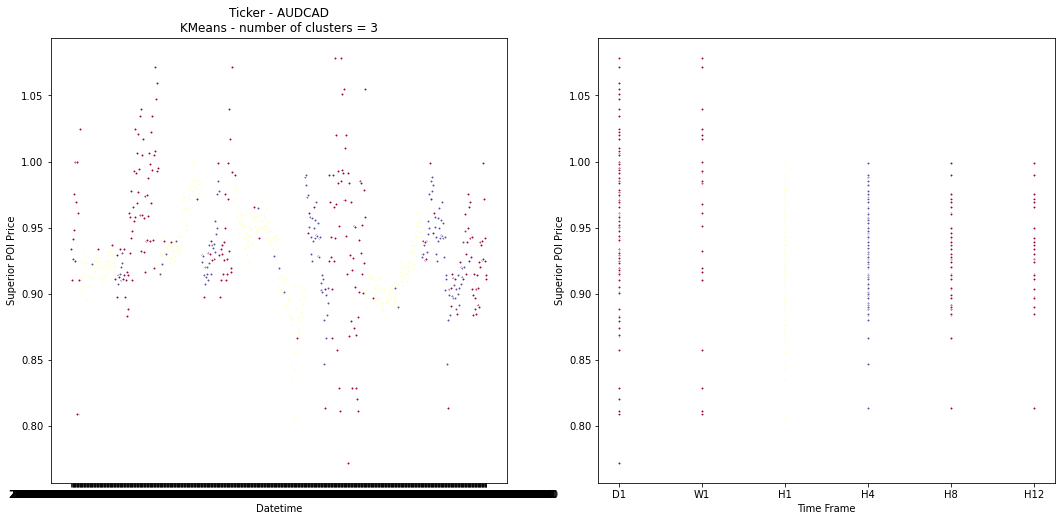

In [50]:
#################################################################
####  kmeans 
#################################################################

ncluster = 3
kmeans = KMeans(ncluster,random_state = 4,n_init = 12).fit(dfX)

labels = kmeans.labels_
clust_center = kmeans.cluster_centers_

#### Eval Metrics ###
print("Ticker - " + tick)
print("Kmeans Silhouette Score for {0} clusters:".format(ncluster) + str(metrics.silhouette_score(dfX,labels)))

#################################################################
#Charts
#################################################################

fig=plt.figure(figsize=(18,18))

############### KMeans chart ################
colors=plt.cm.Spectral(np.linspace(0,1,len(set(labels))))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
for i in range(len(labels)):
    ax1.plot(y[i],X['superior_POI_price'][i],'w',markerfacecolor=colors[labels[i]],marker='.')
    ax2.plot(X['TF'][i],X['superior_POI_price'][i],'w',markerfacecolor=colors[labels[i]],marker='.')
    
    #ax1.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot

ax1.set_title('Ticker - ' + tick + '\nKMeans - number of clusters = 3')
ax1.set_ylabel('Superior POI Price')
ax1.set_xlabel('Datetime')
ax2.set_ylabel('Superior POI Price')
ax2.set_xlabel('Time Frame')
for c in clust_center:
   # plt.axhline(y=c)
    #plt.text(c,c,c)
    print(c)
plt.show()